### 1) Collect Data and construct D

In [1]:
#Collect data and construct D
#simply read in the training set. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#need to read csv files
data_all = pd.read_csv('../data/training_set.csv')
metadata_all = pd.read_csv('../data/training_set_metadata.csv')

# print(type(data_all))

# test = pd.DataFrame(columns = ['object_id', 'mjd', 'passband', 'flux', 'flux_err', 'detected'])

# chunksize = 1000000

# for i, chunk in enumerate(pd.read_csv('../data/test_set.csv', chunksize = chunksize)):
#     test = pd.concat([test, pd.DataFrame(chunk)], ignore_index = True)
#     print('The dataframe shape is', test.shape)

### 1a) Divide D into D'' and D_test. Set D_test aside.

In [2]:
labels_all = pd.DataFrame(metadata_all.iloc[:, 11], columns = ['target'])
metadata_all = metadata_all.drop(['target'], axis = 1)

Dpp_metadata, Dtest_metadata, Dpp_labels, Dtest_labels = train_test_split(metadata_all, labels_all, test_size = 0.2, random_state = 888) 

Dpp_metadata['target'] = Dpp_labels['target']
Dtest_metadata['target'] = Dtest_labels['target']

Dtest_time_series = data_all.loc[data_all['object_id'].isin(Dtest_metadata.loc[:, 'object_id'])]
Dpp_time_series = data_all.loc[data_all['object_id'].isin(Dpp_metadata.loc[:, 'object_id'])]

Dpp_time_series.to_csv(path_or_buf = '../data/all_training_set.csv', index = False)
Dtest_time_series.to_csv(path_or_buf = '../data/all_test_set.csv', index = False)
Dpp_metadata.to_csv(path_or_buf = '../data/all_training_set_metadata.csv', index = False)
Dtest_metadata.to_csv(path_or_buf = '../data/all_test_set_metadata.csv', index = False)

#read data. this is D''
Dpp = pd.read_csv('../data/all_training_set.csv')
Dpp_metadata = pd.read_csv('../data/all_training_set_metadata.csv')

#read test data. This is D_test
test_set = pd.read_csv('../data/all_test_set.csv')
test_set_metadata = pd.read_csv('../data/all_test_set_metadata.csv')

print('The size of D'' is:')
display(Dpp_metadata.shape)
display(Dpp['object_id'].value_counts().shape)
display(Dpp)
print('The size of Dtest (the test set) is:')
display(test_set_metadata.shape)
display(test_set.shape)
display(test_set['object_id'].value_counts().shape)
display(test_set)



/home/aushtin/Desktop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The size of D is:


(6278, 12)

(6278,)

object_id         mjd  passband         flux   flux_err  detected
0              615  59750.4229         2  -544.810303   3.622952         1
1              615  59750.4306         1  -816.434326   5.553370         1
2              615  59750.4383         3  -471.385529   3.801213         1
3              615  59750.4450         4  -388.984985  11.395031         1
4              615  59752.4070         2  -681.858887   4.041204         1
5              615  59752.4147         1 -1061.457031   6.472994         1
6              615  59752.4224         3  -524.954590   3.552751         1
7              615  59752.4334         4  -393.480225   3.599346         1
8              615  59752.4435         5  -355.886780  10.421921         1
9              615  59767.2968         2  -548.013550   3.462291         1
10             615  59767.3045         1  -815.188599   5.293019         1
11             615  59767.3122         3  -475.516052   3.340643         1
12             615  59767.3233         4  -405.663818   3.496113         1
13             615  59767.3343         5  -421.199066   6.377517         1
14             615  59770.2179         2  -554.903198   3.927843         1
15             615  59770.2256         1  -820.042786   5.875329         1
16             615  59770.2334         3  -477.004730   3.736262         1
17             615  59770.2445         4  -400.270386   3.834955         1
18             615  59770.2557         5  -415.286896   7.435979         1
19             615  59779.3188         2  -630.523682   4.333287         1
20             615  59779.3265         1  -921.002502   6.306800         1
21             615  59779.3342         3  -518.533997   3.915225         1
22             615  59779.3452         4  -422.184509   4.089213         1
23             615  59779.3562         5  -422.815094   8.124096         1
24             615  59782.1897         2  -280.039520   2.819228         1
25             615  59782.1974         1  -449.095612   4.028310         1
26             615  59782.2051         3  -316.704865   3.491153         1
27             615  59782.2162         4  -332.885437   4.021619         1
28             615  59782.2274         5  -365.075775   8.514805         1
29             615  59797.2861         2   391.399231   3.098059         1
...            ...         ...       ...          ...        ...       ...
1135393  130779836  60464.2127         2     3.294472  23.675900         0
1135394  130779836  60466.2566         0   113.988297  57.096981         0
1135395  130779836  60490.1588         2    12.464979  23.430984         0
1135396  130779836  60491.1907         1   -13.734149  19.639900         0
1135397  130779836  60496.1248         2   -14.478923  23.485855         0
1135398  130779836  60497.1472         3    12.178056  15.891281         0
1135399  130779836  60498.1867         3   -20.815857  19.349518         0
1135400  130779836  60499.1367         0    54.361107  40.085011         0
1135401  130779836  60503.1145         3     9.912425  27.719427         0
1135402  130779836  60505.1075         2    17.719660  23.651981         0
1135403  130779836  60506.0962         5   -86.457382  57.588879         0
1135404  130779836  60510.2053         4   -39.215195  23.872086         0
1135405  130779836  60515.2731         5   -81.113083  46.094658         0
1135406  130779836  60524.0372         0   136.082718  61.556919         0
1135407  130779836  60525.0621         0    43.910740  59.821396         0
1135408  130779836  60526.1904         3    59.376686  27.732946         0
1135409  130779836  60528.0336         3     5.993599  27.752035         0
1135410  130779836  60530.0978         1     2.986908  19.109673         0
1135411  130779836  60536.0451         5     5.653964  53.119434         0
1135412  130779836  60537.1470         3   -41.850040  26.782366         0
1135413  130779836  60542.0489         4   -60.500492  14.743795         0
1135414  130779836  60543.0247    

The size of Dtest (the test set) is:


(1570, 12)

(286282, 6)

(1570,)

object_id         mjd  passband        flux   flux_err  detected
0             713  59825.2600         2    9.110147   1.013889         0
1             713  59825.2676         1    7.615042   1.160329         1
2             713  59825.2752         3    6.673631   1.932316         1
3             713  59825.2862         4    5.214194   3.018003         0
4             713  59825.2971         5   12.060948   7.163382         0
5             713  59839.2161         2    4.953065   1.196956         0
6             713  59839.2236         1    3.131028   1.351706         0
7             713  59839.2313         3    6.108739   1.789895         0
8             713  59839.2422         4    8.283792   2.527953         0
9             713  59839.2532         5    9.686500   5.882469         0
10            713  59842.1987         2    6.472355   1.110572         0
11            713  59842.2064         1    5.914848   1.134476         1
12            713  59842.2140         3    5.311658   1.683777         0
13            713  59842.2250         4    4.680908   2.349234         0
14            713  59842.2359         5    6.921503   5.573885         0
15            713  59851.2006         0    7.267655   2.866838         0
16            713  59854.2089         2    3.945918   0.922779         0
17            713  59854.2165         1    2.956484   0.953529         0
18            713  59854.2242         3    4.768611   1.422675         0
19            713  59854.2351         4    4.065430   1.943197         0
20            713  59854.2461         5    1.290383   3.980583         0
21            713  59857.1879         2    3.937931   2.088610         0
22            713  59857.1956         1   -2.223347   2.861396         0
23            713  59857.2032         3   -0.476698   2.280299         0
24            713  59857.2141         4    8.054095   2.712542         0
25            713  59857.2251         5   -9.332252   5.174713         0
26            713  59867.1600         2    1.380378   1.105223         0
27            713  59867.1676         1    1.569406   1.369900         0
28            713  59867.1753         3    1.433712   1.730335         0
29            713  59867.1862         4    5.299760   2.530279         0
...           ...         ...       ...         ...        ...       ...
286252  130684460  60441.9671         4   68.789093  23.553371         0
286253  130684460  60446.9678         5  -14.167624  37.536617         0
286254  130684460  60592.3652         3 -102.032936  23.959137         0
286255  130684460  60592.3765         5  -22.118319  24.238285         0
286256  130684460  60595.3772         4  -22.745358  22.771694         0
286257  130684460  60596.3720         5  -49.164928  32.512291         0
286258  130684460  60603.3617         4  -97.015320  18.095453         0
286259  130684460  60611.3654         4  -67.087433  17.995991         0
286260  130684460  60612.3440         0   56.374138  23.953972         0
286261  130684460  60612.3578         4   34.272865  16.863335         0
286262  130684460  60613.3454         0   -8.681022  23.607048         0
286263  130684460  60616.3172         2 -283.750183  16.803749         1
286264  130684460  60619.3151         1  -76.880257  15.340856         0
286265  130684460  60620.3056         2  127.987053  16.897877         0
286266  130684460  60621.3320         3  -37.012535   9.685491         0
286267  130684460  60622.3244         2  -63.745823  16.573709         0
286268  130684460  60629.2796         5  -16.119892  19.158447         0
286269  130684460  60630.3552         4 -143.475861  34.518681         0
286270  130684460  60631.2940         4   36.982517  23.467081         0
286271  130684460  60644.2447         1   67.681351  15.639363         1
286272  130684460  60646.2559         0  -20.528391  12.956310         0
286273  130684460  60647.2674         2  114.139580  11.884579         1
286274  130684460  60648.2234         2 -133.660553  11.867332    

### 1b) Divide D'' into D' and D_pt.

In [3]:
Dpp_labels = pd.DataFrame(Dpp_metadata.iloc[:, 11], columns = ['target'])
Dpp_metadata = Dpp_metadata.drop(['target'], axis = 1)

#D' = training set. D_pt = pretraining set.
training_set_metadata, pretraining_set_metadata, training_labels, pretraining_labels = train_test_split(Dpp_metadata, Dpp_labels, test_size = 0.1, random_state = 888)
training_set_metadata['target'] = training_labels['target']
pretraining_set_metadata['target'] = pretraining_labels['target']

pretraining_set = data_all.loc[data_all['object_id'].isin(pretraining_set_metadata.loc[:, 'object_id'])]
training_set = data_all.loc[data_all['object_id'].isin(training_set_metadata.loc[:, 'object_id'])]

print('The size of D_pt (the pretraining set) is:')
display(pretraining_set_metadata.shape)
display(pretraining_set['object_id'].value_counts().shape)
display(pretraining_set)
print('The size of D\' (the training set) is:')
display(training_set_metadata.shape)
display(training_set['object_id'].value_counts().shape)
display(training_set)



/home/aushtin/Desktop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The size of D_pt (the pretraining set) is:


(628, 12)

(628,)

object_id         mjd  passband       flux   flux_err  detected
1735          1227  59798.3205         2  -0.582374   1.376349         0
1736          1227  59798.3281         1  -1.582251   1.165982         0
1737          1227  59798.3357         3  -1.302728   1.869394         0
1738          1227  59798.3466         4   2.371519   2.794304         0
1739          1227  59798.3576         5  -2.830487   5.891528         0
1740          1227  59801.3553         2   3.025061   2.465573         0
1741          1227  59801.3629         1  -2.330685   3.560404         0
1742          1227  59801.3705         3   0.056206   2.365655         0
1743          1227  59801.3815         4   0.480166   2.707553         0
1744          1227  59801.3924         5  -2.835142   5.890770         0
1745          1227  59818.2740         0   0.864246   1.813478         0
1746          1227  59819.2541         0   0.295979   2.460471         0
1747          1227  59820.2522         0  -1.305724   1.916273         0
1748          1227  59821.2478         0  -1.394430   2.454984         0
1749          1227  59822.2433         0   3.864635   2.895630         0
1750          1227  59823.2659         0   1.041403   2.720342         0
1751          1227  59826.3105         2   0.979677   0.945058         0
1752          1227  59826.3181         1   2.160075   0.946338         0
1753          1227  59826.3258         3  -0.945849   1.628237         0
1754          1227  59826.3367         4  -5.543201   2.377798         0
1755          1227  59826.3477         5  -2.069189   6.037446         0
1756          1227  59842.2456         2   0.008155   0.875288         0
1757          1227  59842.2532         1   1.659540   0.837984         0
1758          1227  59842.2608         3   1.687704   1.457009         0
1759          1227  59842.2718         4   1.683898   2.389070         0
1760          1227  59842.2827         5 -12.695161   6.526993         0
1761          1227  59851.1792         0  -1.524092   2.594528         0
1762          1227  59854.1485         2  -1.071024   1.244128         0
1763          1227  59854.1563         1   2.877295   1.356627         0
1764          1227  59854.1640         3   2.418826   2.003150         0
...            ...         ...       ...        ...        ...       ...
1420903  130716752  60494.2195         2   9.305141   3.764074         0
1420904  130716752  60495.2373         3  -1.405570   5.780351         0
1420905  130716752  60496.2103         2 -26.407637   3.447698         1
1420906  130716752  60502.1929         2   3.288216   2.899035         0
1420907  130716752  60503.2251         3  -4.288847   5.362189         0
1420908  130716752  60506.2583         3  -0.447397   6.229979         0
1420909  130716752  60517.3642         3 -28.414347   8.249083         0
1420910  130716752  60518.1444         3   4.983994   6.273636         0
1420911  130716752  60525.1317         0  -0.316096   9.589116         0
1420912  130716752  60534.1534         3   6.131294   4.718714         0
1420913  130716752  60536.2289         2   1.829730   4.753775         0
1420914  130716752  60538.1067         4  -0.843227   7.027198         0
1420915  130716752  60539.1504         5 -53.256145  31.867840         0
1420916  130716752  60541.1378         5  21.996435  12.216222         0
1420917  130716752  60542.2003         4   1.335877  14.691924         0
1420918  130716752  60545.3446         3  12.456397   6.712866         0
1420919  130716752  60546.0664         1   2.297044   3.366105         0
1420920  130716752  60548.0600         1  -0.735797   3.395185         0
1420921  130716752  60550.0605         2  10.490647   4.177348         0
1420922  130716752  60557.1129         0   3.159431   7.997818         0
1420923  130716752  60565.9995         5  42.597546  33.412697         0
1420924  130716752  60567.0757         5  -8.785971  12.245833         0
1420925  130716752  60572.0596         4   4.235692  12.889403     

The size of D' (the training set) is:


(5650, 12)

(5650,)

object_id         mjd  passband         flux   flux_err  detected
0              615  59750.4229         2  -544.810303   3.622952         1
1              615  59750.4306         1  -816.434326   5.553370         1
2              615  59750.4383         3  -471.385529   3.801213         1
3              615  59750.4450         4  -388.984985  11.395031         1
4              615  59752.4070         2  -681.858887   4.041204         1
5              615  59752.4147         1 -1061.457031   6.472994         1
6              615  59752.4224         3  -524.954590   3.552751         1
7              615  59752.4334         4  -393.480225   3.599346         1
8              615  59752.4435         5  -355.886780  10.421921         1
9              615  59767.2968         2  -548.013550   3.462291         1
10             615  59767.3045         1  -815.188599   5.293019         1
11             615  59767.3122         3  -475.516052   3.340643         1
12             615  59767.3233         4  -405.663818   3.496113         1
13             615  59767.3343         5  -421.199066   6.377517         1
14             615  59770.2179         2  -554.903198   3.927843         1
15             615  59770.2256         1  -820.042786   5.875329         1
16             615  59770.2334         3  -477.004730   3.736262         1
17             615  59770.2445         4  -400.270386   3.834955         1
18             615  59770.2557         5  -415.286896   7.435979         1
19             615  59779.3188         2  -630.523682   4.333287         1
20             615  59779.3265         1  -921.002502   6.306800         1
21             615  59779.3342         3  -518.533997   3.915225         1
22             615  59779.3452         4  -422.184509   4.089213         1
23             615  59779.3562         5  -422.815094   8.124096         1
24             615  59782.1897         2  -280.039520   2.819228         1
25             615  59782.1974         1  -449.095612   4.028310         1
26             615  59782.2051         3  -316.704865   3.491153         1
27             615  59782.2162         4  -332.885437   4.021619         1
28             615  59782.2274         5  -365.075775   8.514805         1
29             615  59797.2861         2   391.399231   3.098059         1
...            ...         ...       ...          ...        ...       ...
1421675  130779836  60464.2127         2     3.294472  23.675900         0
1421676  130779836  60466.2566         0   113.988297  57.096981         0
1421677  130779836  60490.1588         2    12.464979  23.430984         0
1421678  130779836  60491.1907         1   -13.734149  19.639900         0
1421679  130779836  60496.1248         2   -14.478923  23.485855         0
1421680  130779836  60497.1472         3    12.178056  15.891281         0
1421681  130779836  60498.1867         3   -20.815857  19.349518         0
1421682  130779836  60499.1367         0    54.361107  40.085011         0
1421683  130779836  60503.1145         3     9.912425  27.719427         0
1421684  130779836  60505.1075         2    17.719660  23.651981         0
1421685  130779836  60506.0962         5   -86.457382  57.588879         0
1421686  130779836  60510.2053         4   -39.215195  23.872086         0
1421687  130779836  60515.2731         5   -81.113083  46.094658         0
1421688  130779836  60524.0372         0   136.082718  61.556919         0
1421689  130779836  60525.0621         0    43.910740  59.821396         0
1421690  130779836  60526.1904         3    59.376686  27.732946         0
1421691  130779836  60528.0336         3     5.993599  27.752035         0
1421692  130779836  60530.0978         1     2.986908  19.109673         0
1421693  130779836  60536.0451         5     5.653964  53.119434         0
1421694  130779836  60537.1470         3   -41.850040  26.782366         0
1421695  130779836  60542.0489         4   -60.500492  14.743795         0
1421696  130779836  60543.0247    

In [390]:
display(data_all)

object_id         mjd  passband         flux   flux_err  detected
0              615  59750.4229         2  -544.810303   3.622952         1
1              615  59750.4306         1  -816.434326   5.553370         1
2              615  59750.4383         3  -471.385529   3.801213         1
3              615  59750.4450         4  -388.984985  11.395031         1
4              615  59752.4070         2  -681.858887   4.041204         1
5              615  59752.4147         1 -1061.457031   6.472994         1
6              615  59752.4224         3  -524.954590   3.552751         1
7              615  59752.4334         4  -393.480225   3.599346         1
8              615  59752.4435         5  -355.886780  10.421921         1
9              615  59767.2968         2  -548.013550   3.462291         1
10             615  59767.3045         1  -815.188599   5.293019         1
11             615  59767.3122         3  -475.516052   3.340643         1
12             615  59767.3233         4  -405.663818   3.496113         1
13             615  59767.3343         5  -421.199066   6.377517         1
14             615  59770.2179         2  -554.903198   3.927843         1
15             615  59770.2256         1  -820.042786   5.875329         1
16             615  59770.2334         3  -477.004730   3.736262         1
17             615  59770.2445         4  -400.270386   3.834955         1
18             615  59770.2557         5  -415.286896   7.435979         1
19             615  59779.3188         2  -630.523682   4.333287         1
20             615  59779.3265         1  -921.002502   6.306800         1
21             615  59779.3342         3  -518.533997   3.915225         1
22             615  59779.3452         4  -422.184509   4.089213         1
23             615  59779.3562         5  -422.815094   8.124096         1
24             615  59782.1897         2  -280.039520   2.819228         1
25             615  59782.1974         1  -449.095612   4.028310         1
26             615  59782.2051         3  -316.704865   3.491153         1
27             615  59782.2162         4  -332.885437   4.021619         1
28             615  59782.2274         5  -365.075775   8.514805         1
29             615  59797.2861         2   391.399231   3.098059         1
...            ...         ...       ...          ...        ...       ...
1421675  130779836  60464.2127         2     3.294472  23.675900         0
1421676  130779836  60466.2566         0   113.988297  57.096981         0
1421677  130779836  60490.1588         2    12.464979  23.430984         0
1421678  130779836  60491.1907         1   -13.734149  19.639900         0
1421679  130779836  60496.1248         2   -14.478923  23.485855         0
1421680  130779836  60497.1472         3    12.178056  15.891281         0
1421681  130779836  60498.1867         3   -20.815857  19.349518         0
1421682  130779836  60499.1367         0    54.361107  40.085011         0
1421683  130779836  60503.1145         3     9.912425  27.719427         0
1421684  130779836  60505.1075         2    17.719660  23.651981         0
1421685  130779836  60506.0962         5   -86.457382  57.588879         0
1421686  130779836  60510.2053         4   -39.215195  23.872086         0
1421687  130779836  60515.2731         5   -81.113083  46.094658         0
1421688  130779836  60524.0372         0   136.082718  61.556919         0
1421689  130779836  60525.0621         0    43.910740  59.821396         0
1421690  130779836  60526.1904         3    59.376686  27.732946         0
1421691  130779836  60528.0336         3     5.993599  27.752035         0
1421692  130779836  60530.0978         1     2.986908  19.109673         0
1421693  130779836  60536.0451         5     5.653964  53.119434         0
1421694  130779836  60537.1470         3   -41.850040  26.782366         0
1421695  130779836  60542.0489         4   -60.500492  14.743795         0
1421696  130779836  60543.0247    

16    77
65    63
92    14
6     11
53     4
Name: target, dtype: int64

90    193
42    101
62     40
15     35
88     34
52     17
95     15
67     15
64      9
Name: target, dtype: int64

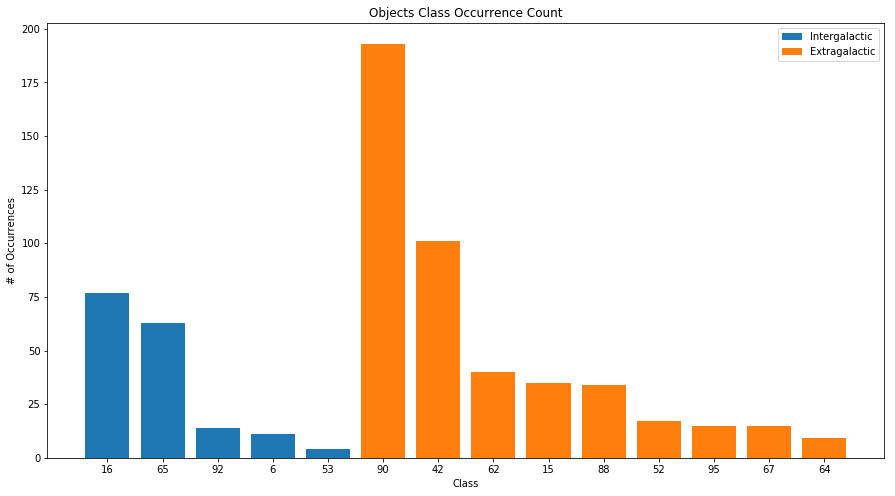

In [327]:
#visualize data in pretraining set

#metadata
class_counts = pretraining_set_metadata['target'].value_counts()


# plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], class_counts)
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], class_counts.index)
# plt.xlabel('Class')
# plt.ylabel('# of Occurrences')
# plt.title('Objects Class Occurrence Count')

#we know that the metadata provides a feature that identifies objects as intergalactic (inside our galaxy) and extragalactic (outside our galaxy).  objects. 

ig = pretraining_set_metadata.loc[pretraining_set_metadata['hostgal_specz'] == 0]
ig_class_counts = ig['target'].value_counts()

display(ig_class_counts)

eg = pretraining_set_metadata.loc[pretraining_set_metadata['hostgal_specz'] != 0]
eg_class_counts = eg['target'].value_counts()

display(eg_class_counts)

total_classes = ig_class_counts.size + eg_class_counts.size

plt.bar(range(0, ig_class_counts.size), ig['target'].value_counts())
plt.bar(range(ig_class_counts.size, total_classes), eg['target'].value_counts())
plt.xticks(range(0, total_classes), ig_class_counts.index.tolist() + eg_class_counts.index.tolist())
# plt.xticks(range(ig_class_counts.size, total_classes), eg_class_counts.index)
plt.xlabel('Class')
plt.ylabel('# of Occurrences')
plt.title('Objects Class Occurrence Count')
plt.legend(['Intergalactic', 'Extragalactic'])



In [42]:
#Count the pretraining object id's
g = pretraining_set.groupby('object_id')
pt_obj_list = []
for name, group in g:
    pt_obj_list.append(name)
    
print('There are', len(pt_obj_list), 'objects in the pretraining set.\n')

There are 628 objects in the pretraining set.



Text(0,0.5,'flux')

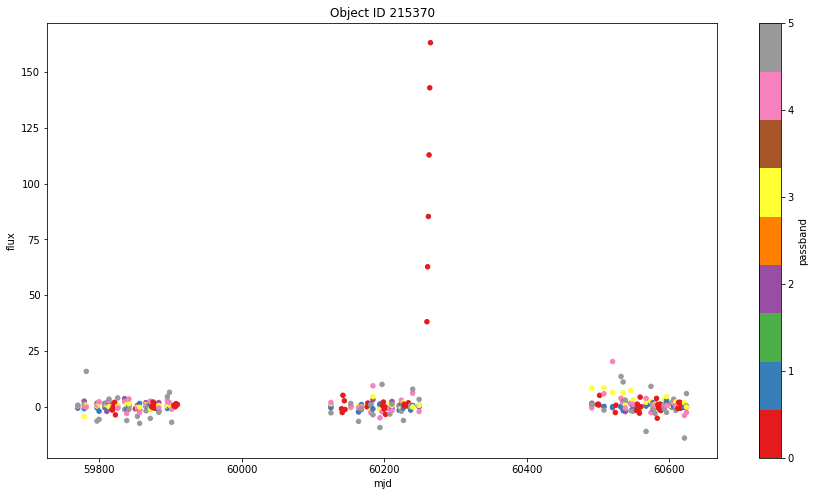

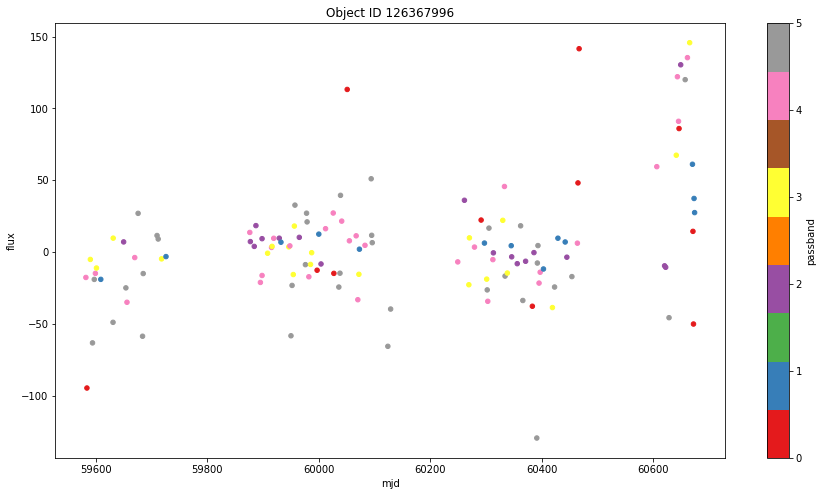

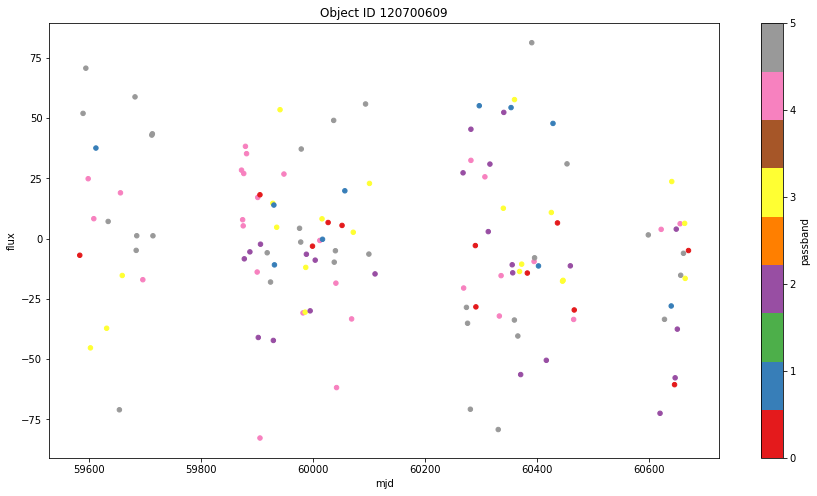

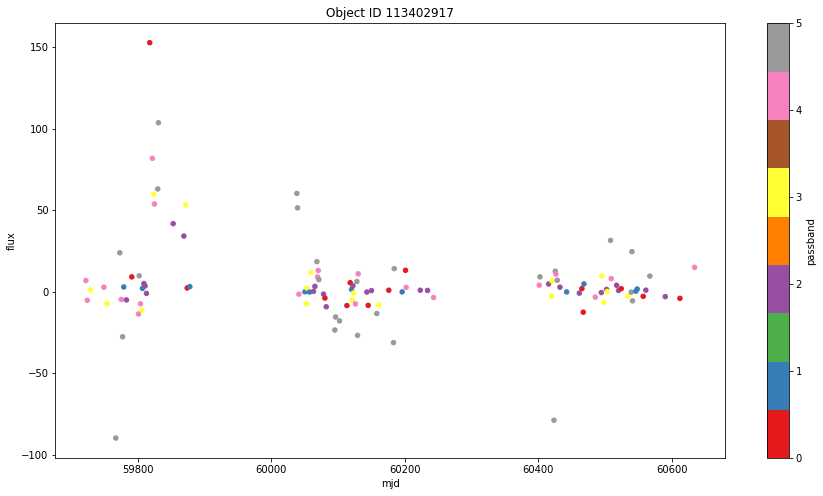

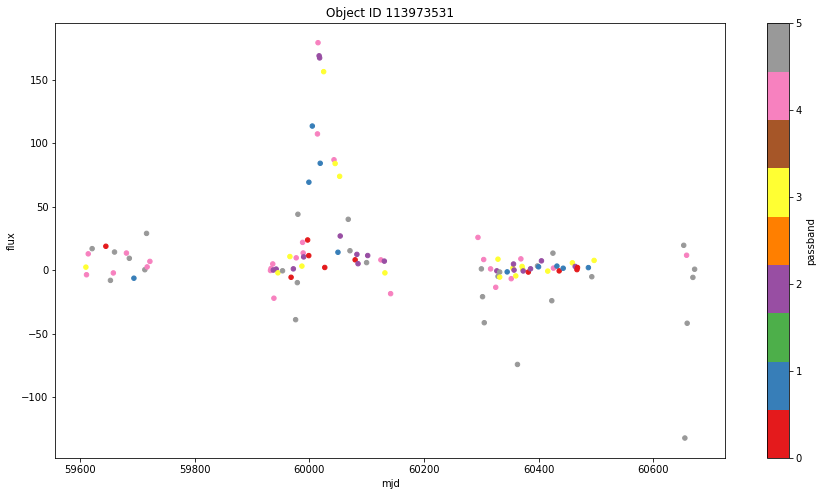

In [43]:
#plot a few light curves

import matplotlib.cm as cmap
import random

plt.rcParams['figure.figsize'] = [15, 8]

obj_id1 = random.choice(pt_obj_list)
obj_id = obj_id1
obj = g.get_group(obj_id)
obj1 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

obj_id2 = random.choice(pt_obj_list)
obj_id = obj_id2
obj = g.get_group(obj_id)
obj2 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

obj_id3 = random.choice(pt_obj_list)
obj_id = obj_id3
obj = g.get_group(obj_id)
obj3 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

obj_id4 = random.choice(pt_obj_list)
obj_id = obj_id4
obj = g.get_group(obj_id)
obj4 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

obj_id5 = random.choice(pt_obj_list)
obj_id = obj_id5
obj = g.get_group(obj_id)
obj5 = obj.copy()
fig, ax = plt.subplots()
ax = obj.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')



In [59]:
#preprocessing. normalize each time series independently.


# def normalize_ts(ts, metadata):

#     normalized_ts = ts.copy()
#     obj_ids = metadata.loc[:, 'object_id']
    
#     for id in obj_ids:
#         for pb in range(0, 6):
#             series = normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id) & (normalized_ts.loc[:,'passband'] == pb), 'flux']
#             mean = series.mean()
#             std = series.std()
#             normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id) & (normalized_ts.loc[:,'passband'] == pb), 'flux'] = series / std

#     return normalized_ts

def normalize_ts(ts, metadata):

    normalized_ts = ts.copy()
    obj_ids = metadata.loc[:, 'object_id']
    n_objects = len(obj_ids)
    
    print('Starting normalization of', n_objects, 'object time series...', end = '')

    for i, id in enumerate(obj_ids):
        for pb in range(0, 6):
            series = normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id), 'flux']
            mean = series.mean()
            std = series.std()
            normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id), 'flux'] = (series - mean) / std
        #print(i+1, 'out of', n_objects, 'done...')
    
    print('done.', n_objects, 'objects have had their time series normalized.')
    
    return normalized_ts

def normalize_ts2(ts, metadata):

    normalized_ts = ts.copy()
    obj_ids = metadata.loc[:, 'object_id']
    n_objects = len(obj_ids)
    
    print('Starting normalization of', n_objects, 'object time series...', end = '')
    groups = ts.groupby(['object_id', 'passband'])
    for id in obj_ids:
        for pb in range(0, 6):
            obj = groups.get_group((id, pb))
            series = obj['flux']
            mean = series.mean()
            std = series.std()
#             block = (series-mean)/std
#             normalized_ts.at[block.index, :]
            normalized_ts.loc[ (normalized_ts.loc[:, 'object_id'] == id), 'flux'] = (series - mean) / std
        #print(i+1, 'out of', n_objects, 'done...')
    
    print('done.')
    
    return normalized_ts

def normalize_ts3(ts, metadata):

    normalized_ts = ts.copy()
#     normalized_ts = pd.DataFrame(columns =  ts.columns)
    obj_ids = metadata.loc[:, 'object_id']
    n_objects = len(obj_ids)
    indices = []
    
    print('Starting normalization of', n_objects, 'object time series...', end = '')
    groups = ts.groupby(['object_id', 'passband'])
    for id in obj_ids:
        for pb in range(0, 6):
 
            obj = groups.get_group((id, pb))
            series = obj['flux']
            mean = series.mean()
            std = series.std()
            obj.loc[:, 'flux'] = (series - mean) /std
            normalized_ts.loc[ obj.index, 'flux'] = (series - mean) / std
        #print(i+1, 'out of', n_objects, 'done...')
    
    print('done.')
    
    return normalized_ts

# normalized_pretraining_set = normalize_ts2(pretraining_set, pretraining_set_metadata)

# display(normalized_pretraining_set['object_id'].value_counts().shape)
# display(pretraining_set['object_id'].value_counts().shape)



Text(17.2,0.5,'flux')

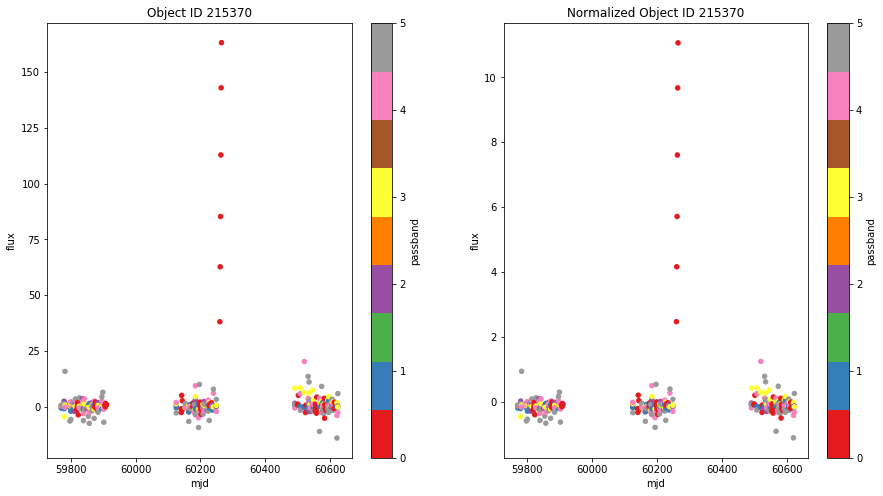

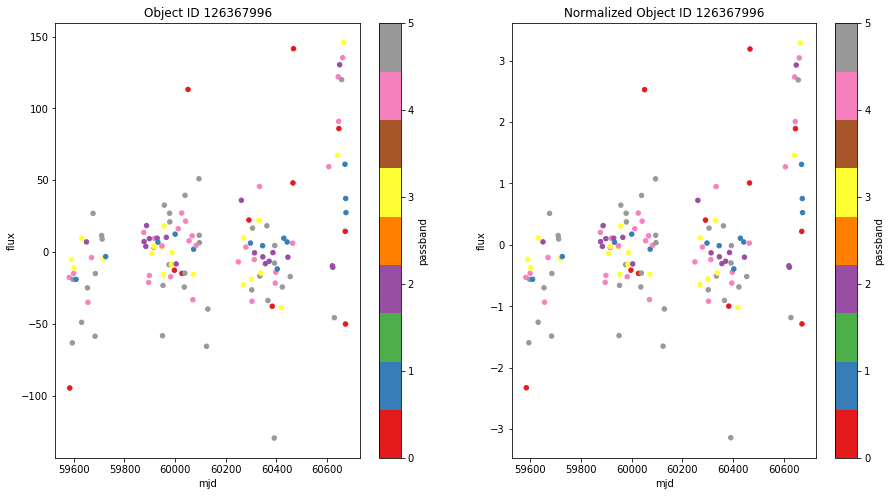

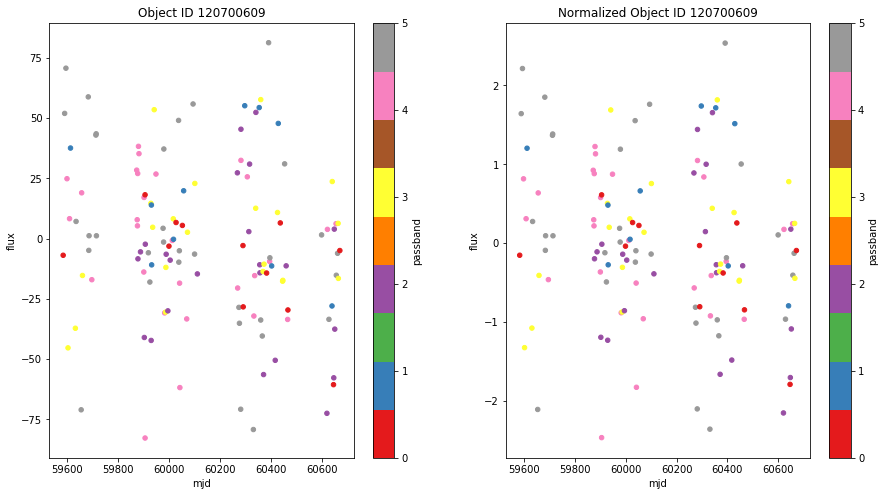

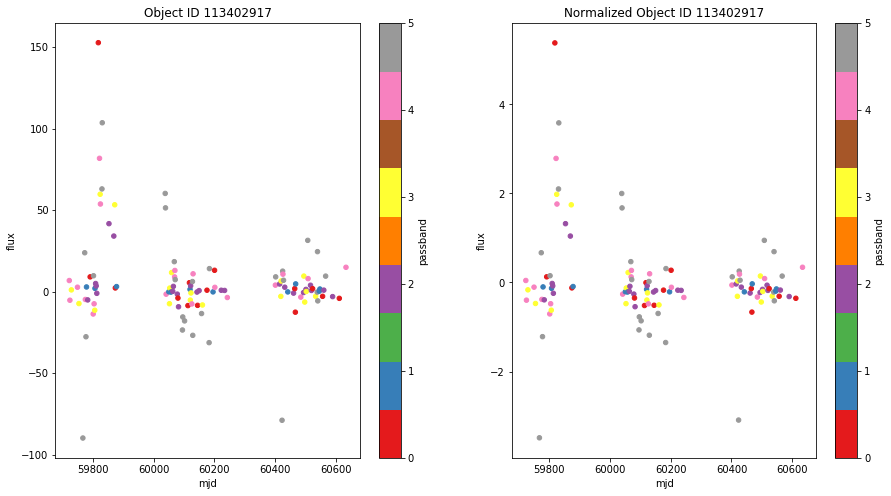

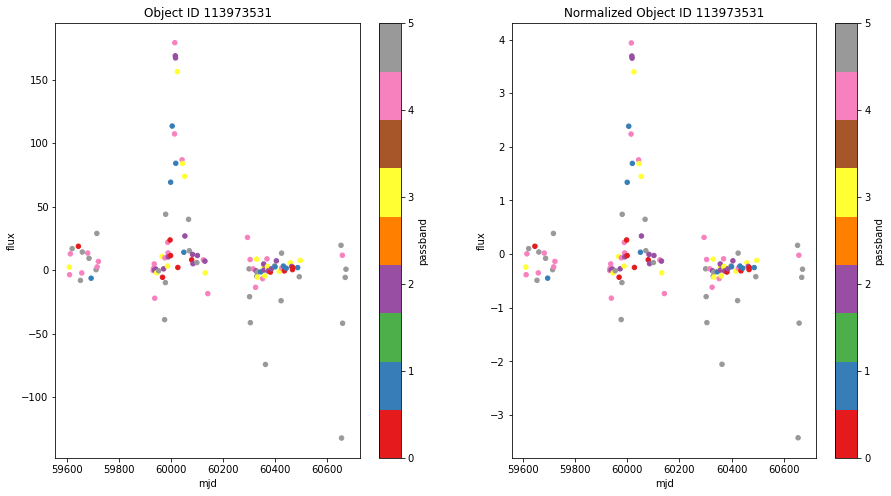

In [48]:
#Count the pretraining object id's
g = normalized_pretraining_set.groupby('object_id')
    
plt.rcParams['figure.figsize'] = [15, 8]

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id1
norm_obj1 = g.get_group(obj_id)

obj1.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj1.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id2
norm_obj2 = g.get_group(obj_id)

obj2.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj2.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id3
norm_obj3 = g.get_group(obj_id)

obj3.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj3.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id4
norm_obj4 = g.get_group(obj_id)

obj4.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj4.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')

fig, [ ax1, ax2 ]  = plt.subplots(nrows = 1, ncols = 2)
obj_id = obj_id5
norm_obj5 = g.get_group(obj_id)

obj5.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Object ID ' + str(obj_id), ax = ax1 )
norm_obj5.plot.scatter(x = 'mjd', y = 'flux', c = 'passband', cmap = cmap.get_cmap('Set1'), title = 'Normalized Object ID ' + str(obj_id), ax = ax2 )
ax.set_xlabel('mjd')
ax.set_ylabel('flux')


In [72]:
def extract_pbts_features (obj_id, df, feats = ['mean', 'stddev', 'med', 'max', 'min', 'kurt', 'skew', 'diff']):

    feature_list = [obj_id]
    for i, f in enumerate(feats):
        for name, obj_ts in df.groupby('passband'):
            ts = obj_ts.loc[:, 'flux'].copy()
            if f == 'mean':
                feature_list.append(ts.mean())
            elif f == 'stddev':
                feature_list.append(ts.std())
            elif f == 'med':
                feature_list.append(ts.median())
            elif f == 'max':
                feature_list.append(ts.max())
            elif f == 'min':
                feature_list.append(ts.min())
            elif f == 'kurt':
                feature_list.append(ts.kurtosis())
            elif f == 'skew':
                feature_list.append(ts.skew())
            elif f == 'diff':
                feature_list.append(ts.max() - ts.min())
            else:
                print("Unrecognized feature passed in:", f)
                return None
    return feature_list

def extract_features(ts_df, metadata, f_names = ['mean', 'stddev', 'med', 'max', 'min', 'kurt', 'skew', 'diff']):
    
    colnames = ['object_id']
    print('Extracting time series features for', metadata.shape[0], 'objects...', end = '')
    for f in f_names:
        for i in range(0, 6):
            colnames.append(f + str(i))

    feature_data = []
    obj_ids = metadata['object_id']
    groups = ts_df.groupby('object_id')
    for id in obj_ids:
        #print('Extracting features for:', id)
        obj_ts = groups.get_group(id)
        feats = extract_pbts_features(id, obj_ts, feats = f_names)
        feature_data.append(feats)

    ts_features = pd.DataFrame(feature_data, columns = colnames)
    
    print('done.')
    
    return ts_features

def addFeatsToMetadata(metadata, feats):
    df_ts_features = feats.iloc[:, 1:len(feats.columns)]
    df_metadata = metadata.iloc[:, 1:len(metadata.columns)]
    df_metadata = df_metadata.reset_index(drop = True)
    df_metadata = df_metadata[['ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz', 'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv']].copy()
    
    #augmented feature dataframe
    features = pd.concat([df_ts_features, df_metadata], axis = 1 )
    features = features.fillna(0)
    
    return features


# f_names = ['max', 'skew', 'stddev', 'diff']
# labels = pretraining_set_metadata.iloc[:, 11]
# features = extract_features(normalized_pretraining_set, pretraining_set_metadata)
# pretraining_features = addFeatsToMetadata(pretraining_set_metadata, features)



In [392]:
display(pretraining_features)

mean0     mean1     mean2     mean3     mean4     mean5   stddev0  \
0    0.030186  0.213313  0.432792  0.543807  0.482729  0.446736  0.064466   
1    0.065030 -0.007234  0.134607  0.120379  0.163694  0.140154  0.368503   
2    0.024501  0.160487  0.106633  0.005814  0.261332  0.266117  0.908974   
3    0.000150  0.444389  0.159771  0.123133  0.338111  0.206646  0.008486   
4   -0.117793 -0.525146 -1.055256 -1.424162 -2.031464 -2.387728  0.270837   
5    0.116658  0.052116  0.220851  0.300325  0.354012 -0.047805  0.522076   
6    0.035383 -0.380135  0.041261 -0.165876  0.033033  0.092780  0.369058   
7    0.106987  0.042783  0.043666 -0.003524  0.011984  0.398768  0.337167   
8   -3.551593 -3.808795 -3.868807 -4.203840 -3.923925 -3.555593  1.105939   
9   -0.008250  0.000052 -0.002057 -0.002176  0.367347  0.043992  0.021373   
10   0.390651  0.151498  0.218013  0.297884  0.258065  0.207464  1.083476   
11   0.091158  0.450545  0.469387  0.516214  0.156447 -0.047314  0.163133   
12  -0.037389  0.010563 -0.021617 -0.118543 -0.094435 -0.099901  0.242438   
13   0.250602 -0.927977 -0.112382  0.101047 -0.124856 -0.082628  0.550570   
14   0.218001  0.136771  0.106846  0.098535  0.047713  0.169553  0.977819   
15   0.245749  0.086186  0.384517 -0.030671  0.283460  0.162717  0.873906   
16   0.042758  1.024496 -0.004638  0.013707  0.173692 -0.008319  0.193214   
17   0.221257  0.436653  0.274236  0.139762  0.488180  0.797455  0.237061   
18   0.042094  0.286355  0.588900  0.551072  0.504770  0.345793  0.117496   
19   0.022390 -0.030089  0.142833 -0.059761  0.679628  0.024088  0.401630   
20   0.050082  0.268830  0.443316  0.623806  0.668657  0.694790  0.160570   
21   0.097815  0.393566  0.845326  0.533924  0.352801  0.172775  0.198088   
22  -0.021530  0.070814  0.410331  0.507450  0.515011  0.589883  0.094876   
23   0.131542  0.002322  0.029743  0.344234  0.133593  0.192496  0.477455   
24   0.089353  0.077441  0.027493  0.175399  0.119418  0.174607  0.447320   
25   0.154175  0.329781  0.065070 -0.028262  0.789471  0.195449  0.523012   
26  -0.030969  0.051240  0.879902  0.223120  0.325830  0.345157  0.118054   
27   0.025273  0.093735  0.382893  0.785492  1.153898  1.408576  0.101209   
28   0.523501  0.527074  0.315793  0.225461  0.128123 -0.173097  0.785822   
29   0.085036  0.313337  0.548547  0.633010  0.622311  0.472672  0.245843   
..        ...       ...       ...       ...       ...       ...       ...   
598  0.259429  0.046076  0.008390  0.037727  0.120054 -0.101513  1.758608   
599  0.421499  0.379450  0.315018  0.363009  0.354867  0.047307  1.045976   
600 -0.028188  0.134103  0.437974  0.231648  0.358871  0.137166  0.149612   
601  0.200993  0.156934  0.556575  0.167407  0.175257 -0.047789  0.792153   
602 -0.152961 -0.033523  0.192099  0.371418  0.176637  0.145169  0.478628   
603 -0.141928  0.177013  0.084651  0.065369  0.747257  0.162205  0.405907   
604  0.515826 -0.004797  0.410693  0.233663  0.177054 -0.075720  1.141824   
605  0.000879  0.040527  0.255775  0.342499  0.527714  0.440111  0.113041   
606  0.005543 -0.163108 -0.138744 -0.256061 -0.258004 -0.181337  0.114775   
607  0.131991  0.067148 -0.032017  0.134932  0.288335  0.650649  0.347574   
608  0.284063  0.237258  0.706630  0.396185  0.354114  0.123987  0.319224   
609  0.042344  0.140619  0.297564  0.589638  0.093397  0.492135  0.211653   
610  0.084775  0.311084  0.529948  0.525080  0.477908  0.358979  0.226595   
611  0.028548  0.365004  0.470878  0.379712  0.384178  0.174527  0.733656   
612  0.513284  0.598646  0.412210  0.245103  0.196503  0.022975  1.288344   
613  0.038069  0.227717  0.396910  0.552699  0.467340  0.327860  0.105984   
614 -0.047359  0.011214 -0.046821  0.224873  0.330568  0.506583  0.240361   
615  0.093728  0.318111  0.310951  0.215205  0.197155  0.274727  0.439721   
616 -0.022245 -0.181316 -0.486382 -0.080153 -0.068786 -0.363577  0.249547   
617  0.049223  0.298691  0.944629  0.470710  0.400092  0.409251  0.203311   
618 

Text(0.5,1,'Correlation of provided Time-Invariant Features')

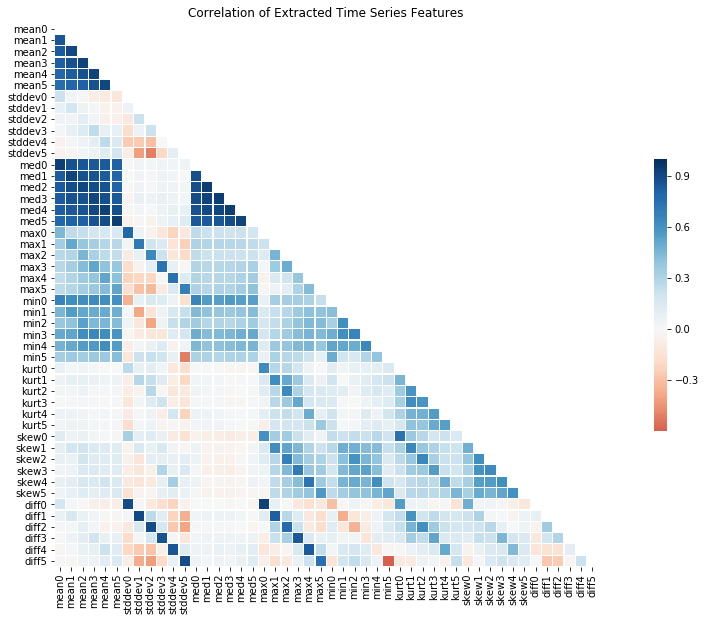

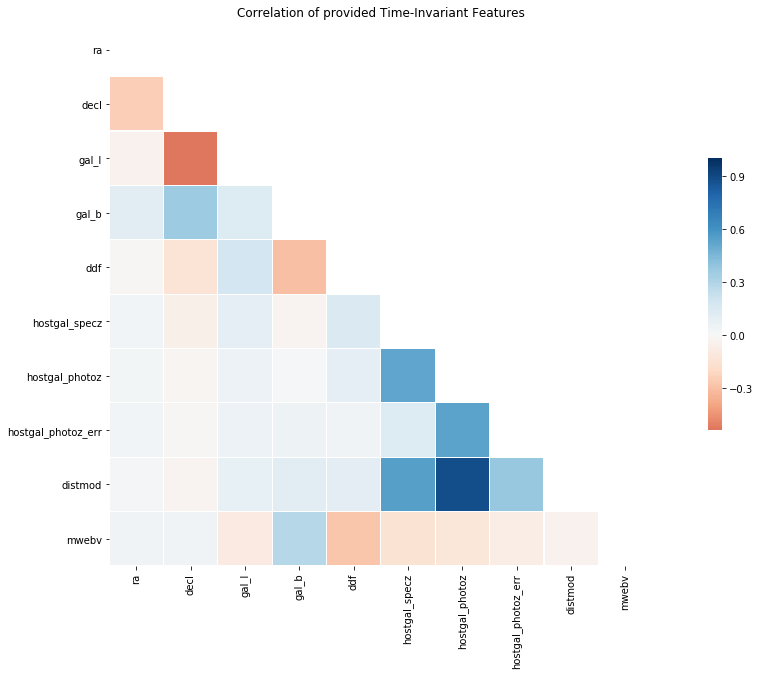

In [393]:
import seaborn as sns

pt_feature_correlation = pretraining_features.iloc[:, 1:len(pretraining_features.columns)].corr()
fig, ax = plt.subplots(figsize = (20, 10))
mask = np.zeros_like(pt_feature_correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
hm = sns.heatmap(pt_feature_correlation,  mask = mask, cmap = 'RdBu', center = 0, square = True, linewidths = .2, cbar_kws = {"shrink":.5})
hm.set_title('Correlation of Extracted Time Series Features')


pt_metadata_correlation = pretraining_set_metadata.iloc[:, 1:11].corr()
mask = np.zeros_like(pt_metadata_correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (20, 10))
hm = sns.heatmap(pt_metadata_correlation,  mask = mask, cmap = 'RdBu', center = 0, square = True, linewidths = .2, cbar_kws = {"shrink":.5})
hm.set_title("Correlation of provided Time-Invariant Features")

array([[ 2.80953749e-04,  3.97068865e-04,  3.60170759e-04, ...,
         8.29733613e-05, -3.52838444e-03,  5.90966844e-05],
       [ 1.49320583e-05, -2.99768915e-04, -3.77053167e-04, ...,
        -1.96564297e-04, -1.77317345e-02,  1.08882774e-04],
       [ 3.32210678e-04,  1.37653983e-05, -7.58918249e-05, ...,
         2.00852736e-04, -7.40152391e-02,  9.11292615e-04],
       ...,
       [ 1.87902332e-01, -4.00361788e-01, -1.44249432e-01, ...,
        -6.55574562e-03,  5.50775617e-04, -4.77534274e-03],
       [ 2.60461276e-01,  2.17658824e-01,  1.80847058e-01, ...,
         1.63477497e-02, -3.62402881e-03,  5.27439781e-02],
       [ 9.91131875e-02, -3.34672209e-01,  3.91382969e-01, ...,
        -2.66290151e-02,  2.32682151e-03, -1.16923407e-02]])

Text(0.5,1,'Correlation of PCA Time Series Features')

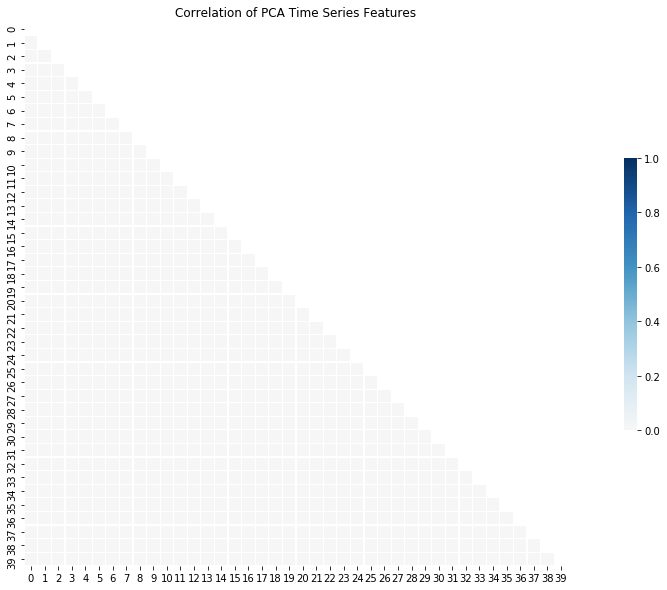

In [400]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
pca_features = pd.DataFrame(pca.fit_transform(pretraining_features.iloc[:, 1:len(pretraining_features.columns)]))

display(pca.components_)

pca_feature_correlation = pca_features.corr()
fig, ax = plt.subplots(figsize = (20, 10))
mask = np.zeros_like(pca_feature_correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
hm = sns.heatmap(pca_feature_correlation,  mask = mask, cmap = 'RdBu', center = 0, square = True, linewidths = .2, cbar_kws = {"shrink":.5})
hm.set_title('Correlation of PCA Time Series Features')

In [61]:
# #normalize training and test sets
# start = time.time()
# normalized_pretraining_set = normalize_ts(pretraining_set, pretraining_set_metadata)
# end = time.time()
# print('total time = ', end-start)
# #normalize training and test sets
# start = time.time()
# normalized_pretraining_set = normalize_ts2(pretraining_set, pretraining_set_metadata)
# end = time.time()
# print('total time = ', end-start)


Starting normalization of 628 object time series...

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: 

Starting normalization of 5650 object time series...done. 5650 objects have had their time series normalized.
total time =  289.0294396877289
Starting normalization of 1570 object time series...done. 1570 objects have had their time series normalized.
total time =  43.89260149002075
Extracting time series features for 5650 objects...done.
Extracting time series features for 1570 objects...done.


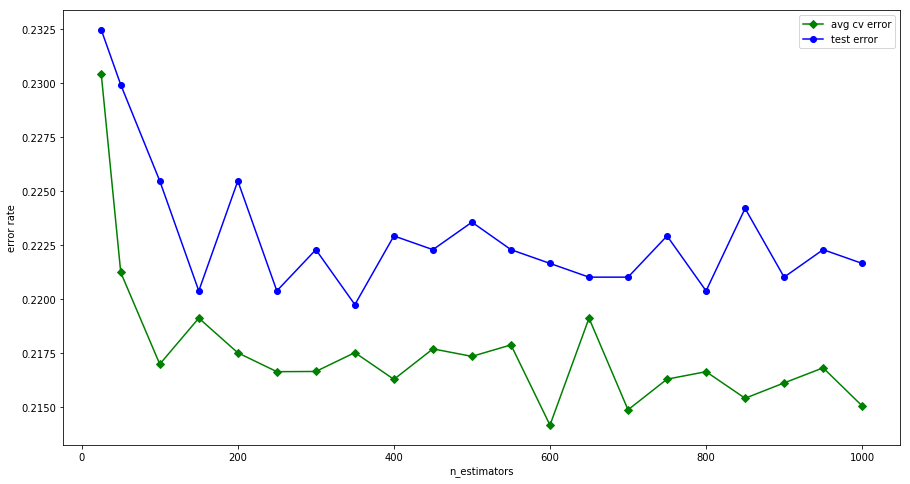

In [73]:
#normalize training and test sets
start = time.time()
normalized_training_set = normalize_ts(training_set, training_set_metadata)
end = time.time()
print('total time = ', end-start)
#normalize training and test sets
start = time.time()
normalized_test_set = normalize_ts(test_set, test_set_metadata)
end = time.time()
print('total time = ', end-start)

features = extract_features(normalized_training_set, training_set_metadata)
training_labels = training_set_metadata['target']
training_features= addFeatsToMetadata(training_set_metadata, features)

features = extract_features(normalized_test_set, test_set_metadata)
test_labels = test_set_metadata['target']
test_features = addFeatsToMetadata(test_set_metadata, features)

def learning_curves(parameters, x_train, y_train, x_test, y_test):
    cv_avg_errors = []
    test_errors = []
    train_errors = []
    for p in parameters:
        model = RandomForestClassifier(n_estimators = p)
        cv_scores = cross_val_score(model, x_train, y_train, cv = StratifiedKFold(5))
        avg = sum(cv_scores)/5.0
        cv_avg_errors.append(1.0-avg)
        
        
        model.fit(x_train, y_train)
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        train_errors.append(1.0-train_score)
        test_errors.append(1.0-test_score)
    
    plt.plot(parameters, cv_avg_errors, '-gD')
    plt.plot(parameters, test_errors, '-bo')
    plt.legend(['avg cv error', 'test error'])
    plt.xlabel('n_estimators')
    plt.ylabel('error rate')
    plt.show()
    
params = [25, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
learning_curves(params, training_features, training_labels, test_features, test_labels)
#display(training_features)
#display(test_features)

In [69]:
display(training_features)

mean0     mean1     mean2     mean3     mean4     mean5   stddev0  \
0    -0.076802 -0.128035  0.100674 -0.156701  0.551136 -0.345574  0.366941   
1    -0.428634 -0.336128  0.015785  0.169559  0.377310  0.243254  0.091465   
2    -0.337886 -0.249849  0.306261 -0.094025  0.015420  0.076557  0.478639   
3    -0.298440 -0.030225  0.151319  0.178663  0.090654  0.025038  0.126393   
4    -0.371610 -0.292353  0.008329  0.110182  0.093790  0.073482  0.270335   
5    -0.290827 -0.275829 -0.058482  0.093008  0.237045 -0.093276  0.041929   
6    -0.407198 -0.080049  0.113053  0.214592  0.073370 -0.109467  0.393713   
7    -0.348692 -0.060382  0.187298  0.081065  0.126757  0.044786  0.116210   
8     0.214405  0.428134 -0.011792 -0.016770 -0.007742 -0.246751  1.568123   
9    -0.124851  0.028149  0.150515  0.073871  0.248862 -0.344007  0.314927   
10   -0.408312 -0.195512  0.203869  0.214962 -0.079246  0.049677  0.201598   
11   -0.255975 -0.192540 -0.070974  0.222599  0.245616 -0.034051  0.261174   
12   -0.169855 -0.074242  0.084921  0.075221  0.153977 -0.021883  0.325624   
13   -0.343543 -0.415123 -0.389226 -0.239548  0.223360  0.638769  0.205315   
14   -0.439382 -0.055791  0.051560  0.269932  0.059557 -0.082924  0.227796   
15    0.116683 -0.049787  0.089898 -0.125858 -0.134736  0.095386  0.702577   
16   -0.002338  0.086379  0.092503 -0.085545  0.076352 -0.104553  0.701735   
17    0.119583 -0.008468 -0.045278 -0.040526  0.024783 -0.085793  0.387772   
18   -0.529593 -0.319091  0.202257  0.070291  0.016002  0.072634  0.230663   
19   -0.115750  0.045681 -0.171992 -0.183863  0.202479  0.105470  0.369135   
20   -0.328896 -0.251067  0.002077  0.202212  0.219521  0.046520  0.169285   
21    0.420087 -0.149963 -0.158080 -0.058818 -0.104893  0.068574  2.146458   
22   -0.137412 -0.269694  0.078258  0.058975  0.121954 -0.099366  0.690445   
23    0.242873 -0.216033 -0.134468 -0.200778 -0.027485  0.177054  0.300588   
24    0.014572 -0.240030 -0.083283  0.232633  0.020569  0.014482  0.078246   
25    1.770154  1.142234  0.178180 -0.296942 -0.298076 -0.916433  0.880142   
26   -0.224853 -0.413824  0.166259 -0.165296  0.258753 -0.067558  0.781742   
27    0.156231 -0.010402 -0.133832 -0.209206 -0.020485  0.301404  0.872629   
28   -0.190390 -0.179185  0.161815 -0.102269 -0.081350  0.112943  0.567527   
29   -0.202931 -0.230743  0.654019 -0.060718  0.020703 -0.265322  0.267006   
...        ...       ...       ...       ...       ...       ...       ...   
5620 -0.243475 -0.330263 -0.107119  0.049362  0.367731  0.371627  0.422171   
5621 -0.152941  0.299151  0.170401 -0.286771  0.145673 -0.122690  0.272452   
5622 -0.240882  0.319622 -0.691944  0.298287  0.235894 -0.047675  0.553796   
5623 -0.431253 -0.144344  0.172043 -0.182942  0.126131  0.120195  0.028167   
5624 -0.386581 -0.368468 -0.251347 -0.141208 -0.123220  0.514144  0.315098   
5625 -0.553368  0.282614 -0.167500  0.337902 -0.066114  0.042343  0.961668   
5626 -0.369686 -0.351936  0.220584  0.309397  0.193998 -0.197280  0.209693   
5627  0.200518  0.021683 -0.283708 -0.307833  0.022684  0.251892  0.208333   
5628  0.198248  0.017440  0.237145  0.019003 -0.110223 -0.110708  0.919739   
5629 -0.222637  0.308135  0.157522 -0.113019 -0.088554 -0.013348  0.193133   
5630 -0.109363  0.459020 -0.094321 -0.042683  0.134303 -0.170231  0.418200   
5631 -0.222274 -0.179717  0.007914  0.050329  0.162189 -0.027244  0.345188   
5632 -0.446034 -0.479264 -0.406861 -0.245596 -0.036619  0.690172  0.120965   
5633  0.456950  0.007760 -0.385361 -0.049029 -0.116793  0.286056  0.083972   
5634 -0.311745 -0.184262 -0.053892  0.071510  0.160227  0.090460  0.144369   
5635 -0.250678 -0.097439  0.117389  0.011021 -0.132105  0.116500  0.355735   
5636 -0.126369 -0.099252  0.312274 -0.190060 -0.015940 -0.023569  0.303301   
5637 -0.333438 -0.323725  0.102853  0.206577  0.083835 -0.067811  0.341344   
5638 -0.244331 -0.112106  0.062810  0.128867  0.031132  0.052184  0.315933   
5639 -0.553956 -0.303206 -0.067

In [16]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


gnb = GaussianNB()


cv_scores = cross_val_score(gnb, training_features, training_labels, cv = StratifiedKFold(5))

print('Cross Validation scores for Gaussian NB on the intergalactic test set are:\n')
print(*cv_scores.round(5), sep = ',')

gnb.fit(training_features, training_labels)
gnb_score = gnb.score(test_features, test_labels)
print('Accuracy for Gaussian NB classifier on test set is:', round(gnb_score, 5))

def cv_and_predict_logreg(train_features, train_labels, test_features, test_labels, l = 'l1', C = 1.0, solver = 'liblinear', n_jobs = -1):
    
    
    log = LogisticRegression(penalty = l, C = C, solver = solver, max_iter = 1000, multi_class = 'ovr', n_jobs = n_jobs)
    
    cv_scores = cross_val_score(log, train_features, train_labels, cv = StratifiedKFold(5))

    print('----------------------------------------------------------------')
    print('|****LogisticRegression with', l, 'penalty', 'and C = ', C, '****|')
    print('cv scores: ', *cv_scores.round(5), sep = ' ')

    log.fit(train_features, train_labels)
    log_score = log.score(test_features, test_labels)
    print('test score:', round(log_score, 5))
    print('----------------------------------------------------------------\n\n')
    return cv_scores, log_score, log 

#cv, score, model = cv_and_predict_logreg(train_features = training_features, train_labels = training_labels, test_features = test_features, test_labels = test_labels, l = 'l2', solver = 'lbfgs')

cv, score, model = cv_and_predict_logreg(train_features = training_features, train_labels = training_labels, test_features = test_features, test_labels = test_labels, l = 'l1', C = .1)

dt = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(dt, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****                    Decision Tree                     ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

dt.fit(training_features, training_labels)
dt_score = dt.score(test_features, test_labels)
print('test score:', round(dt_score, 5))
print('----------------------------------------------------------------\n\n')


rf = RandomForestClassifier(n_estimators = 500)

cv_scores = cross_val_score(rf, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               Random Forest Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

rf.fit(training_features, training_labels)
rf_score = rf.score(test_features, test_labels)
print('test score:', round(rf_score, 5))
print('----------------------------------------------------------------\n\n')

ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = 500)

cv_scores = cross_val_score(ab, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               AdaBoost      Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

ab.fit(training_features, training_labels)
ab_score = ab.score(test_features, test_labels)
print('test score:', round(ab_score, 5))
print('----------------------------------------------------------------\n\n')


Cross Validation scores for Gaussian NB on the intergalactic test set are:

0.59279,0.60301,0.60939,0.56738,0.61244
Accuracy for Gaussian NB classifier on test set is: 0.58344


KeyboardInterrupt: 

In [66]:
import logging
import time

start = time.time()
chunks = 5000000
remain_df = None

def create_logger():
    logger_ = logging.getLogger('main')
    logger_.setLevel(logging.DEBUG)
    fh = logging.FileHandler('simple_lightgbm.log')
    fh.setLevel(logging.DEBUG)
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    formatter = logging.Formatter('[%(levelname)s]%(asctime)s:%(name)s:%(message)s')
    fh.setFormatter(formatter)
    ch.setFormatter(formatter)
    # add the handlers to the logger
    logger_.addHandler(fh)
    logger_.addHandler(ch)
    

def get_logger():
    return logging.getLogger('main')

def train_model(training_features, training_labels):
    
    
    rf = RandomForestClassifier(n_estimators = 500)
    cv_scores = cross_val_score(rf, training_features, training_labels, cv = StratifiedKFold(5))
    cv_avg = sum(cv_scores)/5.0
    
    print('----------------------------------------------------------------')
    print('|****               Random Forest Classifier               ****|')
    print('cv scores: ', *cv_scores.round(5), sep = ' ')

    rf.fit(training_features, training_labels)
    rf_score = rf.score(test_features, test_labels)
    print('Dtest score:', round(rf_score, 5))
    print('----------------------------------------------------------------\n\n')    
    
    return rf

def the_unique(x):
    return [x[i] for i in range(len(x)) if x[i] != x[i-1]]


def predict(ts, metadata, model):
    
    #normalize
    normalized_ts = normalize_ts(ts, metadata)
    
    #extract features
    f_names = ['max', 'skew', 'stddev', 'diff']
    ts_features = extract_features(ts, metadata)
    features = addFeatsToMetadata(metadata, ts_features)
    probs = model.predict_proba(features)
    probs_df = pd.DataFrame(probs, columns = ['class_' + str(c) for c in model.classes_])
    probs_df.insert(0, 'object_id', metadata['object_id'])
    probs_df['class_99'] = .00001
    
    gc.collect()
    return probs_df
    
def predict_test_set_probs(model):
    
    start = time.time()
    remain_df = None
    chunks = 2000000
    
    test_set_md = pd.read_csv('../data/test_set_metadata.csv')
    
    for i_c, df in enumerate(pd.read_csv('../data/test_set.csv', chunksize=chunks, iterator=True)):
        # Check object_ids
        # I believe np.unique keeps the order of group_ids as they appear in the file
        # My belief is wrong (I should have read the doc !)
        # A big thank you to https://www.kaggle.com/filby89
        # Use .tolist() is almost 3 times faster than the_unique(df['object_id'].values)
        unique_ids = the_unique(df['object_id'].tolist())
        new_remain_df = df.loc[df['object_id'] == unique_ids[-1]].copy()

        if remain_df is None:
            df = df.loc[df['object_id'].isin(unique_ids[:-1])].copy()
        else:
            df = pd.concat([remain_df, df.loc[df['object_id'].isin(unique_ids[:-1])]], axis=0)

        # Create remaining samples df
        remain_df = new_remain_df

        probs_df = predict(ts= df, metadata = test_set_md.loc[test_set_md['object_id'].isin(unique_ids[:-1])], model = model)

        if i_c == 0:
            probs_df.to_csv('submission.csv', header=True, index=False, float_format='%.6f')
        else:
            probs_df.to_csv('submission.csv', header=False, mode='a', index=False, float_format='%.6f')

        del probs_df
        gc.collect()

        if (i_c + 1) % 10 == 0:
            get_logger().info('%15d done in %5.1f' % (chunks * (i_c + 1), (time.time() - start) / 60))
            print('%15d done in %5.1f' % (chunks * (i_c + 1), (time.time() - start) / 60))

    # Compute last object in remain_df

        probs_df = predict(ts= df, metadata = test_set_md.loc[test_set_md['object_id'].isin(unique_ids[:-1])], model = model)

        probs_df.to_csv('submission.csv', header=False, mode='a', index=False, float_format='%.6f')

#     z = pd.read_csv('submission.csv')

#     z = z.groupby('object_id').mean()

#     z.to_csv('single_predictions_v3.csv', index=True, float_format='%.6f')


In [67]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
model = train_model(training_features, training_labels)

----------------------------------------------------------------
|****               Random Forest Classifier               ****|
cv scores:  0.9701 0.96817 0.97254 0.96543 0.96267
Dtest score: 0.96433
----------------------------------------------------------------




In [68]:
import gc
gc.enable()
predict_test_set_probs(model)

Starting normalization of 6059 object time series...done. 6059 objects have had their time series normalized.
Extracting time series features for 6059 objects...done.


ValueError: Number of features of the model must match the input. Model n_features is 59 and input n_features is 58 

In [411]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline

pca = PCA()
gnb = GaussianNB()

pipe = make_pipeline(pca, gnb)

cv_scores = cross_val_score(pipe, training_features, training_labels, cv = StratifiedKFold(5))

print('Cross Validation scores for Gaussian NB on the intergalactic test set are:\n')
print(*cv_scores.round(5), sep = ',')

pipe.fit(training_features, training_labels)
gnb_score = pipe.score(test_features, test_labels)
print('Accuracy for Gaussian NB classifier on test set is:', round(gnb_score, 5))

def cv_and_predict_logreg(train_features, train_labels, test_features, test_labels, l = 'l1', C = 1.0, solver = 'liblinear', n_jobs = -1):
    
    pca = PCA()
    log = LogisticRegression(penalty = l, C = C, solver = solver, max_iter = 1000, multi_class = 'ovr', n_jobs = n_jobs)
    
    pipe = make_pipeline(pca, log)
    cv_scores = cross_val_score(pipe, train_features, train_labels, cv = StratifiedKFold(5))

    print('----------------------------------------------------------------')
    print('|****LogisticRegression with', l, 'penalty', 'and C = ', C, '****|')
    print('cv scores: ', *cv_scores.round(5), sep = ' ')

    pipe.fit(train_features, train_labels)
    log_score = pipe.score(test_features, test_labels)
    print('test score:', round(log_score, 5))
    print('----------------------------------------------------------------\n\n')
    return cv_scores, log_score, log 

#cv, score, model = cv_and_predict_logreg(train_features = training_features, train_labels = training_labels, test_features = test_features, test_labels = test_labels, l = 'l2', solver = 'lbfgs')

cv, score, model = cv_and_predict_logreg(train_features = training_features, train_labels = training_labels, test_features = test_features, test_labels = test_labels, l = 'l1', C = .1)

dt = tree.DecisionTreeClassifier()
pipe = make_pipeline(pca, dt)
cv_scores = cross_val_score(pipe, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****                    Decision Tree                     ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

pipe.fit(training_features, training_labels)
dt_score = pipe.score(test_features, test_labels)
print('test score:', round(dt_score, 5))
print('----------------------------------------------------------------\n\n')


rf = RandomForestClassifier(n_estimators = 500)
pipe = make_pipeline(pca, rf)
cv_scores = cross_val_score(pipe, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               Random Forest Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

pipe.fit(training_features, training_labels)
rf_score = pipe.score(test_features, test_labels)
print('test score:', round(rf_score, 5))
print('----------------------------------------------------------------\n\n')

ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = 500)

cv_scores = cross_val_score(ab, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               AdaBoost      Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

ab.fit(training_features, training_labels)
ab_score = ab.score(test_features, test_labels)
print('test score:', round(ab_score, 5))
print('----------------------------------------------------------------\n\n')


Cross Validation scores for Gaussian NB on the intergalactic test set are:

0.65435,0.6702,0.66253,0.64628,0.65067
Accuracy for Gaussian NB classifier on test set is: 0.64841
----------------------------------------------------------------
|****LogisticRegression with l1 penalty and C =  0.1 ****|
cv scores:  0.71328 0.72591 0.72276 0.71543 0.72711
test score: 0.7242
----------------------------------------------------------------


----------------------------------------------------------------
|****                    Decision Tree                     ****|
cv scores:  0.61566 0.59859 0.6395 0.60195 0.63022
test score: 0.61465
----------------------------------------------------------------


----------------------------------------------------------------
|****               Random Forest Classifier               ****|
cv scores:  0.74142 0.74978 0.74491 0.73759 0.74933
test score: 0.73185
----------------------------------------------------------------


--------------------------

In [338]:
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier

svm = SVC()

cv_scores = cross_val_score(svm, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****                    SVM    Classifier                 ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

svm.fit(training_features, training_labels)
ab_score = svm.score(test_features, test_labels)
print('test score:', round(ab_score, 5))
print('----------------------------------------------------------------\n\n')


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aushtin/Desktop/venv/lib/python3.7/si

----------------------------------------------------------------
|****                    SVM    Classifier                 ****|
cv scores:  0.44679 0.43855 0.43401 0.42908 0.42311


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test score: 0.47707
----------------------------------------------------------------




## Let's do a shitty Gaussian Naive Bayes to get started

In [305]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold

gnb = GaussianNB()
cv_scores = cross_val_score(gnb, training_features, training_labels, cv = StratifiedKFold(5))

print('Cross Validation scores for Gaussian NB on the intergalactic test set are:\n')
print(*cv_scores.round(5), sep = ',')

gnb.fit(training_features, training_labels)
gnb_score = gnb.score(test_features, test_labels)
print('Accuracy for Gaussian NB classifier on test set is:', round(gnb_score, 5))

# mnb = MultinomialNB()
# cv_scores = cross_val_score(mnb, ig_training_features, ig_training_labels, cv = StratifiedKFold(5))

# print('Cross Validation scores for Gaussian NB on the intergalactic test set are:\n')
# print(*cv_scores.round(5), sep = ',')

# mnb.fit(ig_training_features, ig_training_labels)
# mnb_score = mnb.score(ig_test_features, ig_test_labels)
# print('Accuracy for Multinomial NB classifier on test set is:', round(mnb_score, 5))


Cross Validation scores for Gaussian NB on the intergalactic test set are:

0.62357,0.6313,0.62622,0.59043,0.62756
Accuracy for Gaussian NB classifier on test set is: 0.61338


## Hey, that's pretty bad.

## Let's try again but with Logistic Regression...

In [306]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFE

def cv_and_predict_logreg(train_features, train_labels, test_features, test_labels, l = 'l1', C = 1.0, solver = 'liblinear', n_jobs = -1):
    
    
    log = LogisticRegression(penalty = l, C = C, solver = solver, max_iter = 1000, multi_class = 'ovr', n_jobs = n_jobs)
    
    cv_scores = cross_val_score(log, train_features, train_labels, cv = StratifiedKFold(5))

    print('----------------------------------------------------------------')
    print('|****LogisticRegression with', l, 'penalty', 'and C = ', C, '****|')
    print('cv scores: ', *cv_scores.round(5), sep = ' ')

    log.fit(train_features, train_labels)
    log_score = log.score(test_features, test_labels)
    print('test score:', round(log_score, 5))
    print('----------------------------------------------------------------\n\n')
    return cv_scores, log_score, log 

#cv, score, model = cv_and_predict_logreg(train_features = training_features, train_labels = training_labels, test_features = test_features, test_labels = test_labels, l = 'l2', solver = 'lbfgs')

cv, score, model = cv_and_predict_logreg(train_features = training_features, train_labels = training_labels, test_features = test_features, test_labels = test_labels, l = 'l1', C = 10)

----------------------------------------------------------------
|****LogisticRegression with l1 penalty and C =  10 ****|
cv scores:  0.75286 0.75597 0.75642 0.74025 0.75467
test score: 0.7414
----------------------------------------------------------------




## Better, but still bad. Now let's run again but be explicit in our regularization. Try both L1 and L2 regression, varying C over a range (really low = high regression, really high = no regression).


In [26]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import statistics

l2_cvmax = -1;
l2_c_opt = -1;
l2_best_test = -1;
l2_errors = []
for c in [.1, .3, .5, .7, .8, 1.0, 10.0, 50, 100.0, 1000.0]:
    l2_cv, l2_score, l2_model = cv_and_predict_logreg(training_features, training_labels, test_features, test_labels, l = 'l2', C = c, solver = 'lbfgs')
    l2_avg_cv = statistics.mean(l2_cv)
    l2_errors_append(l2_avg_cv)
    if l2_avg_cv > l2_cvmax:
        l2_cvmax = l2_avg_cv
        l2_c_opt = c
        l2_best_test = l2_score

print('The maximum l2 cv score is ', l2_cvmax, 'when C = ', l2_c_opt)
print('The test score for this case is ', l2_best_test)

l1_cvmax = -1;
l1_c_opt = -1;
l1_best_test = -1;
l1_errors = []
for c in [.1, .3, .5, .7, .8, 1.0, 10.0, 50, 100.0, 1000.0]:
    l1_cv, l1_score, l1_model = cv_and_predict_logreg(training_features, training_labels, test_features, test_labels, C = c)
    l1_avg_cv = statistics.mean(l1_cv)
    l1_errors.append(l1_avg_cv)
    if l1_avg_cv > l1_cvmax:
        l1_cvmax = l1_avg_cv
        l1_c_opt = c
        l1_best_test = l1_score

print('The maximum l1 cv score is ', l1_cvmax, 'when C = ', l1_c_opt)
print('The test score for this case is ', l1_best_test)


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.1 ****|
cv scores:  0.68993 0.67832 0.67462 0.67119 0.68189


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.68025
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.2 ****|
cv scores:  0.69469 0.67832 0.68735 0.66879 0.69391


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69809
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.3 ****|
cv scores:  0.69389 0.68308 0.68894 0.668 0.69391


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69682
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.4 ****|
cv scores:  0.70103 0.67752 0.69053 0.67039 0.69792


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.70127
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.5 ****|
cv scores:  0.70024 0.68229 0.67462 0.67199 0.69872


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69936
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.6 ****|
cv scores:  0.69548 0.68388 0.68178 0.668 0.69391


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69745
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.7 ****|
cv scores:  0.69944 0.6807 0.68815 0.67279 0.69792


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69682
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.8 ****|
cv scores:  0.70182 0.68626 0.69053 0.67039 0.69551


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.7
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  0.9 ****|
cv scores:  0.70262 0.68546 0.68974 0.67119 0.70112


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.70255
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  1.0 ****|
cv scores:  0.69944 0.67355 0.68735 0.67199 0.69231


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69618
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  10.0 ****|
cv scores:  0.70896 0.68546 0.69928 0.668 0.69631


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.70064
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  50.0 ****|
cv scores:  0.70658 0.68467 0.6961 0.66959 0.70433


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.70064
----------------------------------------------------------------




/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

----------------------------------------------------------------
|****LogisticRegression with l2 penalty and C =  100.0 ****|
cv scores:  0.71213 0.68149 0.68974 0.67598 0.70833


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Incre

test score: 0.69299
----------------------------------------------------------------


The maximum l2 cv score is  0.6935349866677671 when C =  100.0
The test score for this case is  0.6929936305732484


/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/aushtin/Desktop/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Solver lbfgs supports only l2 penalties, got l1 penalty.

In [307]:
from sklearn import tree
import graphviz

dt = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(dt, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****                    Decision Tree                     ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

dt.fit(training_features, training_labels)
dt_score = dt.score(test_features, test_labels)
print('test score:', round(dt_score, 5))
print('----------------------------------------------------------------\n\n')


----------------------------------------------------------------
|****                    Decision Tree                     ****|
cv scores:  0.68162 0.66048 0.65988 0.64628 0.66489
test score: 0.6828
----------------------------------------------------------------




In [323]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)

cv_scores = cross_val_score(rf, d_training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               Random Forest Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

rf.fit(training_features, training_labels)
rf_score = rf.score(test_features, test_labels)
rf_probs = rf.predict_proba(test_features)
print('test score:', round(rf_score, 5))
print('classes:', rf.classes_)
print('test probabilities:', rf_probs.round(4))
print('----------------------------------------------------------------\n\n')

test_set_metadata

----------------------------------------------------------------
|****               Random Forest Classifier               ****|
cv scores:  0.78012 0.78515 0.78388 0.78103 0.79289
test score: 0.77834
classes: [ 6 15 16 42 52 53 62 64 65 67 88 90 92 95]
test probabilities: [[0.   0.   0.98 ... 0.   0.02 0.  ]
 [0.   0.   0.   ... 0.75 0.   0.01]
 [0.   0.   0.   ... 0.06 0.   0.84]
 ...
 [0.   0.04 0.   ... 0.75 0.   0.06]
 [0.01 0.   0.21 ... 0.   0.78 0.  ]
 [0.   0.11 0.   ... 0.24 0.   0.01]]
----------------------------------------------------------------




object_id          ra       decl       gal_l      gal_b  ddf  \
0        272197  347.846710 -64.760857  318.929827 -49.143596    1   
1      58755427  313.709015 -44.201530  356.586148 -40.171280    0   
2      35341109  225.527344 -41.411190  327.720224  15.086393    0   
3      81017882  192.128906  -5.979157  301.601858  56.885044    0   
4        304846  150.996094   4.181528  235.291975  43.970869    1   
5      25176849   18.281250 -34.409527  271.674092 -81.359695    0   
6      10777360   18.808594 -20.105511  161.986630 -81.113620    0   
7      88949087  263.671875   0.149208   24.052623  17.079120    0   
8     108771817  143.964844 -23.317957  255.139062  20.905901    0   
9      99468282  109.335938 -32.974850  245.260881  -9.437042    0   
10       331321   51.328125 -27.447618  222.535046 -55.950727    1   
11    118048579  337.675781 -38.682186    2.396985 -58.518908    0   
12     74818669  264.375000 -10.655059   14.721593  11.127567    0   
13     40757084  359.472656  -1.790785   93.820321 -61.598121    0   
14     25797702  170.332031  -7.782714  267.717732  48.829881    0   
15       214668   53.789062 -27.784405  223.685697 -53.845803    1   
16     80673882   76.113281 -21.702768  222.405090 -32.735175    0   
17     21004292  126.035156   2.686724  221.450118  21.792454    0   
18    118945475  106.797234 -49.507675  260.033277 -17.883695    0   
19       142867  349.966217 -62.696659  319.542989 -51.376556    1   
20     13160209  177.539062 -17.739365  282.895218  42.735529    0   
21       290322   34.101562  -5.829153  170.247753 -60.638325    1   
22       125762    1.753247 -46.768478  324.030235 -68.498041    1   
23         9172  346.655182 -63.260487  320.952196 -50.040935    1   
24     42857334   77.172897 -50.091457  256.806250 -36.674147    0   
25     70317034  293.507477 -52.608990  345.228802 -27.525574    0   
26     56320877  127.372879 -57.209084  272.848774 -10.564435    0   
27    127947078  176.835938 -25.117701  285.049399  35.518470    0   
28      9839433   82.265625 -16.179399  218.898165 -25.322000    0   
29     32550698  184.218750  -4.630479  286.901413  57.161613    0   
...         ...         ...        ...         ...        ...  ...   
1540  115508066  324.960480 -42.410164  358.573094 -48.424615    0   
1541     197299  148.710938   2.836105  235.050801  41.328739    1   
1542   20796602   29.179688   0.447628  155.228583 -58.270305    0   
1543   12398973  102.480469 -19.788050  230.530765  -9.201619    0   
1544    2258216  219.607437 -44.597992  322.237648  14.225964    0   
1545  111679787  130.253906  -3.882372  229.858505  22.190164    0   
1546   29356260  269.472656   0.895283   27.549200  12.307210    0   
1547   22408171  325.546875 -35.136116    9.591961 -49.103128    0   
1548   79430982   84.552635 -54.724628  262.515880 -32.255862    0   
1549   98377483   46.582031  -6.279288  186.058749 -51.782414    0   
1550      71084   52.558594 -27.279613  222.538937 -54.845107    1   
1551     259884   33.398438  -3.732834  166.492280 -59.466614    1   
1552     164805   51.679688 -27.447618  222.618229 -55.642263    1   
1553   89908996  197.402344 -35.318771  307.106586  27.405638    0   
1554   87842606  351.562500 -14.940303   60.220001 -66.742270    0   
1555   33846439    6.855469  -2.388015  108.830144 -64.600198    0   
1556     180290  359.446716 -44.201530  331.730015 -69.805709    1   
1557   61803685    1.757812 -10.958863   87.944383 -70.750522    0   
1558     175185   32.871094  -4.780192  166.959493 -60.615132    1   
1559   28978765   98.613281 -21.381943  230.445698 -13.156123    0   
1560   38249774  204.786102 -55.299438  309.738437   6.940590    0   
1561  129964738  185.625000 -38.111038  296.685212  24.409461    0   
1562   36757403  356.095886 -49.117878  328.927465 -64.488264    0   
1563   88989291  204.082031  -9.291553  321.105263  51.989146    0   
1564  112301542  201.445312 -29.827860  311.760860  32.454438    0   
1565    3883673 

In [228]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500)

cv_scores = cross_val_score(rf, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               Random Forest Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

rf.fit(training_features, training_labels)
rf_score = rf.score(test_features, test_labels)
print('test score:', round(rf_score, 5))
print('----------------------------------------------------------------\n\n')

----------------------------------------------------------------
|****               Random Forest Classifier               ****|
cv scores:  0.79068 0.78957 0.79539 0.78103 0.79467
test score: 0.7828
----------------------------------------------------------------




In [309]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = 500)

cv_scores = cross_val_score(ab, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               AdaBoost      Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

ab.fit(training_features, training_labels)
ab_score = ab.score(test_features, test_labels)
print('test score:', round(ab_score, 5))
print('----------------------------------------------------------------\n\n')

----------------------------------------------------------------
|****               AdaBoost      Classifier               ****|
cv scores:  0.52331 0.56587 0.52702 0.60727 0.58844
test score: 0.57834
----------------------------------------------------------------




In [336]:
from sklearn import tree
import graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

dt_ovr = OneVsRestClassifier(DecisionTreeClassifier(), n_jobs = -1)
cv_scores = cross_val_score(dt_ovr, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****                    Decision Tree                     ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

dt_ovr.fit(training_features, training_labels)
dt_ovr_score = dt_ovr.score(test_features, test_labels)
print('test score:', round(dt_ovr_score, 5))
print('----------------------------------------------------------------\n\n')



rf_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100), n_jobs = -1)

cv_scores = cross_val_score(rf_ovr, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               Random Forest Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

rf_ovr.fit(training_features, training_labels)
rf_ovr_score = rf_ovr.score(test_features, test_labels)
print('test score:', round(rf_ovr_score, 5))
print('----------------------------------------------------------------\n\n')



ab_ovr = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), n_estimators = 500), n_jobs = -1)

cv_scores = cross_val_score(ab_ovr, training_features, training_labels, cv = StratifiedKFold(5))

print('----------------------------------------------------------------')
print('|****               AdaBoost      Classifier               ****|')
print('cv scores: ', *cv_scores.round(5), sep = ' ')

ab_ovr.fit(training_features, training_labels)
ab_ovr_score = ab_ovr.score(test_features, test_labels)
print('test score:', round(ab_ovr_score, 5))
print('----------------------------------------------------------------\n\n')

----------------------------------------------------------------
|****                    Decision Tree                     ****|
cv scores:  0.61653 0.61273 0.60585 0.61613 0.61956
test score: 0.60637
----------------------------------------------------------------


----------------------------------------------------------------
|****               Random Forest Classifier               ****|
cv scores:  0.78012 0.77365 0.78654 0.77837 0.79644
test score: 0.77771
----------------------------------------------------------------


----------------------------------------------------------------
|****               AdaBoost      Classifier               ****|
cv scores:  0.75726 0.76039 0.77414 0.76596 0.77156
test score: 0.75796
----------------------------------------------------------------




In [17]:
df1 = training_features[training_features.isnull().any(axis=1)]

#ig_training_features.isnull().values.any()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df1)
#    display(pd.isna(ig_training_features))

stddev0       med0         max0         min0       kurt0       mean1  \
5     12.0228   -1.13432      26.3907     -20.4516    0.913829    -5.94437   
13    124.122   -31.4955      176.298     -330.715     3.10401    -289.746   
14    2.37885   0.237357      6.92149     -5.80772     1.98159   -0.133958   
17    108.818    16.1257       54.309     -363.202     10.4254     87.7789   
19    43.1519   -37.4549      24.4403     -99.3698   -0.836205    -27.3056   
22    13.3294   -5.22373      13.1115     -34.3547    0.478637    -19.4227   
30    2.65788  -0.654379      8.02251     -9.90313     2.86525  -0.0253276   
31      2.314 -0.0806025      4.34642     -7.50112      1.4593    0.361056   
33    8.50893   -1.35884      17.8379       -8.205    -1.36121     17.0125   
35    68.1992    6.70882      162.976     -97.1342      1.4104    -5.51163   
36    11.6082   -4.31775      20.5933     -22.0707  -0.0143856    -24.5659   
38    364.582    654.665      1028.55     -26.9048   -0.438435     651.686   
42    14.1642  -0.263529       32.402     -16.0441     1.33322     2.43715   
50    7.64259    4.12358      9.71995     -13.9152   0.0058492      1.9661   
51    25.6187   0.613378       90.064     -7.37818     7.82444     51.5065   
54    89.8931    65.9162      106.697     -233.478     9.37194     698.765   
62      99.66   -50.4762      146.503     -146.007   -0.995956    -8.36881   
66    10.4948   -1.85705      21.2966     -11.0528   -0.349024    0.993034   
67    40.0009    -17.788      52.0073     -93.5846   -0.109423    -11.2077   
69    85.3778    3.61487      319.167     -21.5082     13.5471     -1.0101   
70    220.021   -4.46096      752.139     -26.8588     11.9456    -1.47419   
71    10.5309   -3.87409      56.1792     -9.59725     15.6228    -2.00206   
87    11.2474   -295.803     -257.078      -308.34     8.05442    -379.196   
95    18.2493   -4.31105      33.0453      -40.983     1.58639    -24.1245   
97    8.30183  0.0730675       13.868     -14.7432   -0.197282  -0.0956305   
99    11.8612   -4.84308      19.1952     -25.2741     1.40788     2.01894   
103   32.7316   -10.1912      23.2687     -94.2029       1.706     3.79603   
105   76.5379    4.52906      265.887     -30.3549     9.09811     5.38831   
106   7.89606    -2.4216      10.0374     -12.3105    -1.57366    -5.73712   
109   79.8804   -51.2758      108.712      -152.09  -0.0753416    -154.824   
110   394.432   -233.589      182.622      -966.98    -1.36985    -2869.52   
114   10.1879   0.014625      83.3832     -5.02136     62.8283     0.53557   
119   93.8946    -7.9232      72.6881     -346.636     4.37816    -115.335   
122   532.159  -0.195242       1394.8     -8.43982     1.88903    -0.36208   
132   12.2677    -1.0888      39.4645     -19.2671     6.20088   -0.115023   
133   75.0059    15.3668       172.38     -120.972     1.24256     -408.17   
134   6.80522  -0.141994      15.8389     -11.5592    0.553499     1.50892   
135   7.81675   0.583485      59.6695     -6.48891     52.9838   -0.218275   
137   141.071    -25.238      207.401     -177.626    -1.56819    -176.613   
138   37.9531   -5.88719      20.7762     -96.6897   -0.113831    -64.5254   
143   12.2939  -0.528715      88.3225     -6.87285     35.3069     3.95638   
146   120.454   0.882171      989.614      -4.2482     63.1002     9.12631   
148   10.4462   -4.44541      12.8962     -18.7018      -1.204    -1.86704   
149   10.4928   -2.48994      12.9732     -17.4836    -1.44296     8.91997   
150   10.7883    6.00992      32.2485     -3.72282    0.948344   0.0954556   
152   2.52004  -0.328203      6.82874     -4.71719   0.0540624     3.80839   
159    35.413   -8.29758       84.617     -31.8294      3.1214    -830.966   
160   1.83699  -0.178747      4.93753     -4.27169    0.352955    0.754554   
170    11.753     3.8024       32.712     -9.15109     1.32386    -1.03083   
172   16.2586    2.88566      31.5918     -25.1682    0.720699    -16.7466   
173   4.11969  -0.999529    

In [171]:
ig_test_features

mean0  stddev0      med0     max0     min0       kurt0      mean1  \
0     -1.90375  14.0348   3.91956  24.4279 -24.6157   -0.142822   -5.46703   
1      2.79148  7.45104   1.82002  15.3411 -6.23904    -1.15229    6.16008   
2    -0.156867   2.6072 -0.028935  7.87448 -7.40965      1.2502   0.885713   
3      1.14084  7.19428  0.323879  16.5944 -10.6162    0.519233  -0.144123   
4    -0.586249  2.58479 -0.379845  5.55536 -9.89015     2.21796   0.135416   
5      -20.049  32.7316  -10.1912  23.2687 -94.2029       1.706    3.79603   
6     -40.7963  231.626 -0.628669  23.5454 -1265.83     29.8541   -201.902   
7      4.29615  8.47894   4.19841  18.5278 -15.1846     1.21817   0.617385   
8     -42.1436  58.3374  -18.0246  28.2431 -137.021   -0.825087    73.6604   
9      4.87846  12.9946    4.2335  33.4361  -17.117     1.28888   0.993862   
10     19.2219  66.4468  -5.34489  153.655 -58.1943   -0.167926   -47.0734   
11   -0.969011  9.87912 -0.222866  13.7314 -20.2514   -0.225941  -0.261166   
12    -6.50241  8.41559  -4.94819  5.39843 -21.8044    0.663603     36.633   
13    -4.71239  10.4462  -4.44541  12.8962 -18.7018      -1.204   -1.86704   
14     2.62423  16.1521  -1.00909  86.3894 -4.02144     27.3566    13.8175   
15    -2.89521  61.0054   19.1478  32.2878 -254.988     9.90934   -116.193   
16     6.41397  11.2444   6.79394  24.5022 -18.7621    0.697829    12.7434   
17     38.6789   184.09   45.2429  300.487 -252.695    -1.08356    3.02868   
18     3.37292  27.9195  0.212439  233.068 -4.18347      69.293  0.0699834   
19     8.24702  20.1907   13.2602    37.56  -22.686   -0.569865    86.6145   
20   -0.865699  5.27571  -1.79277  8.77219 -9.65692    0.743496    60.5192   
21    0.373375  2.45728  0.094285  5.46414 -5.47001   0.0040198 -0.0376599   
22    -1.48689  8.95968   -1.6775  11.4615 -17.3746   -0.929729    1.22454   
23     -35.468  56.3507  -33.7377  42.2301  -141.29   -0.162877   -218.318   
24    -3.59889  93.3335   35.3245  101.701 -163.994    -1.12599   -13.9437   
25     18.7948  24.6988   21.5162  75.0351 -33.0356     1.64789    96.0822   
26   -0.878576  25.4149  -6.11657  48.6864  -30.114    0.255956    20.0411   
27      27.198  54.7527   6.80306  149.542 -11.0625      2.7203    2.17541   
28     2.81109  13.0715  0.701681  71.2708 -3.49244      28.586   0.302143   
29     3.45253  12.6013   2.66178  21.8143 -19.4187    -0.57429    21.0423   
..         ...      ...       ...      ...      ...         ...        ...   
435    -1.1151  11.4585  -1.23167  16.8798 -15.8198     -0.8744   -6.97297   
436    50.4913  93.7072   36.6085  289.121 -62.1872     3.19815   -9.86942   
437    4.77503  10.5479   4.47133  28.0784 -11.6955     1.67059   -51.1498   
438     815.51  756.949   1021.73   1824.2 -140.038    -1.90339    4314.91   
439   -91.5538  215.274  -83.5906  311.407 -373.222   -0.496282    432.759   
440 -0.0569593   17.506  0.820993  45.3196 -29.1899     3.62499   -7.36368   
441   -275.875  1415.89   30.9737   1860.5  -4028.2     2.70374    107.443   
442    7.50616  46.7665   8.15581  76.2489 -72.7812   -0.639522    356.222   
443   -41.2457  14.8478  -41.1566 -6.19282 -68.6367     1.85417   -51.1976   
444    2.12361  17.4385   4.06638  36.1668 -26.0877   0.0507469    4.49058   
445   -3.30957  10.0535  -1.14318  6.72407  -52.201     11.4409   -10.4916   
446    35.0889  30.6752   42.7824  63.0105 -43.9651     3.35129    547.776   
447    -5.3351  14.9196    -2.003  25.7721 -27.8012    0.777726   -1.92911   
448  -0.161175  14.9158  -2.22834  121.012 -6.16785     65.7342   -2.86602   
449    6.02271  17.2782   1.45175  52.7974 -9.29529     5.91446    4.24813   
450    22.6987   63.586   7.03463  200.485 -24.6271     9.08393  -0.982837   
451    10.3462  62.6911  -1.51369  341.712 -6.00957     29.7755    32.7185   
452   -2.58259  11.2936   -1.3034  13.8326 -21.2235     -0.8268    2.92412   
453  -0.444792  3.00062 -0.549208  6.11684 -7.59926  -0.0853414  -0.540488   
454    161.467  574.634   50.14

In [194]:
eg_training_set_metadata

object_id          ra       decl       gal_l      gal_b  ddf  \
0        211096   33.574219  -5.379379  168.838090 -60.637536    1   
1     122596778   41.835938 -40.423901  249.485543 -62.670837    0   
2      35176095   73.300781 -15.713861  214.608003 -33.102006    0   
3         43028   51.679688 -27.447618  222.618229 -55.642263    1   
4      92999561  346.992188 -13.094776   57.913773 -62.043330    0   
5         71676   53.437500 -29.142223  225.908120 -54.336118    1   
6      47791642  181.757812 -34.409527  292.608270  27.570460    0   
7        276083   33.574219  -5.379379  168.838090 -60.637536    1   
8        104476   51.855469 -28.630989  224.733260 -55.649872    1   
9          3423  349.615387 -63.636005  318.927246 -50.506542    1   
10    101679595  329.415588 -46.768478  351.094627 -50.788884    0   
11     14603353  342.246094 -38.682186    0.776789 -61.994797    0   
12     57866499  126.914062 -20.264481  242.327818  10.508389    0   
13    100101119  329.765625 -10.048350   47.320707 -46.012531    0   
14     49101755  332.284760 -62.132156  328.877281 -45.979131    0   
15     78415707  149.800003 -47.945496  275.576881   5.566474    0   
16        72426   51.679688 -27.447618  222.618229 -55.642263    1   
17     14705653   23.027344 -41.014500  274.438944 -73.786415    0   
18     86006342  180.175781 -21.702768  287.567484  39.650524    0   
19       306095   33.574219  -5.379379  168.838090 -60.637536    1   
20     55111045  332.402344 -31.738394   15.516535 -54.664954    0   
21     94344279   22.851562 -29.142223  228.135268 -80.964628    0   
22       110768  351.734680 -62.884678  318.284128 -51.651217    1   
23        39626  149.414062   2.238686  236.239766  41.565558    1   
24     37992187  211.464844 -29.656013  321.700439  30.489035    0   
25       244487  151.171875   2.238686  237.619933  42.994783    1   
26       100097  348.529419 -61.755440  321.293980 -51.763351    1   
27        77222  151.171875   1.342993  238.602520  42.464379    1   
28     30101939  206.542969 -11.719760  323.582515  48.944957    0   
29     41673236  317.285156  -6.279288   43.899650 -33.366848    0   
...         ...         ...        ...         ...        ...  ...   
4388     193639  351.259003 -64.386185  317.344860 -50.255113    1   
4389   27358045  222.866379 -46.571846  323.467301  11.458624    0   
4390   79737563   67.139999 -43.008633  247.717266 -43.707847    0   
4391   43771884  295.312500 -10.655059   28.883317 -15.837901    0   
4392     148976   53.964844 -28.630989  225.142950 -53.813613    1   
4393   33253530    0.703125 -18.367102   68.443026 -75.787537    0   
4394  121615670   51.503906 -19.155010  208.628145 -53.730897    0   
4395     309268  148.886719   2.686724  235.347248  41.389003    1   
4396   36122473  318.867188 -28.122234   18.539690 -42.561369    0   
4397   39734537  190.722656 -16.024099  299.931142  46.797842    0   
4398      43337   51.328125 -27.447618  222.535046 -55.950727    1   
4399     305891   54.667969 -27.615883  223.610785 -53.050840    1   
4400  128699652  166.289062 -26.777105  275.368815  30.344932    0   
4401   28210173  242.226562   0.746060   12.325228  35.835321    0   
4402   33009012   46.230469 -35.685333  238.092182 -60.422025    0   
4403     220426  148.710938   2.836105  235.050801  41.328739    1   
4404     335803  150.468750   3.732834  235.392208  43.283244    1   
4405  104767924  265.605469 -14.477512   12.012878   8.140418    0   
4406   78789297   58.223682 -47.357574  255.167980 -49.377301    0   
4407  109477227  201.269531 -24.624317  312.594596  37.615447    0   
4408   28073345  133.945312  -6.129201  234.063954  24.092284    0   
4409     203976   53.437500 -29.142223  225.908120 -54.336118    1   
4410  121323466  167.519531 -32.089951  279.127632  26.054269    0   
4411   38249774  204.786102 -55.299438  309.738437   6.940590    0   
4412     186345   53.261719 -27.615883  223.280041 -54.281374    1   
4413   95669793 

Text(0.5,1,'Intergalactic Objects Class Occurrence Count')

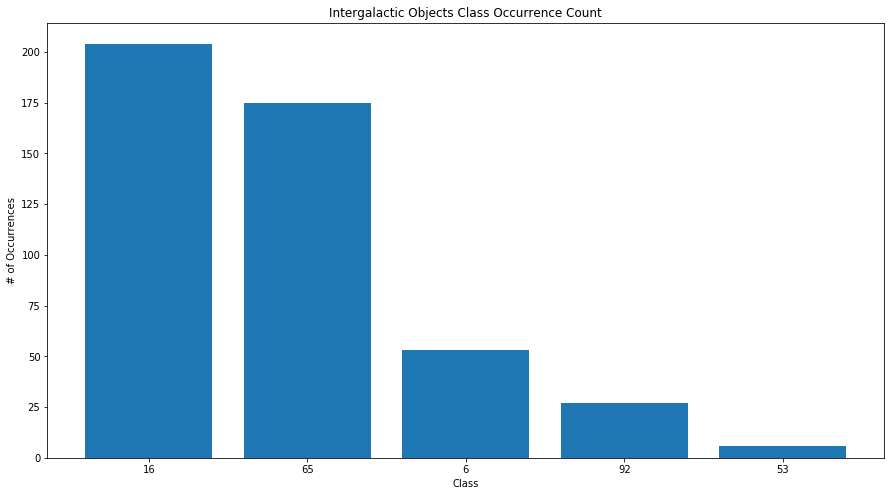

In [195]:
#visualize data

#metadata
ig_test_set_metadata.target.unique()

plt.bar([0, 1, 2, 3, 4], ig_test_set_metadata['target'].value_counts())
plt.xticks([0, 1, 2, 3, 4], ig_test_set_metadata.target.unique())
plt.xlabel('Class')
plt.ylabel('# of Occurrences')
plt.title('Intergalactic Objects Class Occurrence Count')


In [ ]:
#extract some features. just extract a bunch.
import math

def extract_ts_features(ts, metadata, feats):
    
    obj_ids = metadata['object_id']
    cols = ['object_id']
    for i in range(0, 6):
        for f in feats:
            cols.append(f + str(i))
    
    df_features = pd.DataFrame(columns = cols)
#     df_features = pd.DataFrame(columns = ['object_id', 'mean0', 'stddev0', 'med0', 'max0', 'min0', 'kurt0', 'skew0',  
#                                                    'mean1', 'stddev1', 'med1', 'max1', 'min1', 'kurt1','skew1',
#                                                    'mean2', 'stddev2', 'med2', 'max2', 'min2', 'kurt2', 'skew2',
#                                                    'mean3', 'stddev3', 'med3', 'max3', 'min3', 'kurt3', 'skew3', 
#                                                    'mean4', 'stddev4', 'med4', 'max4', 'min4', 'kurt4', 'skew4',
#                                                    'mean5', 'stddev5', 'med5', 'max5', 'min5', 'kurt5', 'skew5'])
                                                   
    index = 0         
    g = ts.groupby('object_id')
    for id in obj_ids:
        obj = g.get_group(id)
        features = []
        pb_groups = obj.groupby('passband')
        for name, pbg in obj.groupby('passband'):
            #find mean for each passband
            flux = pbg['flux']
            mean = flux.mean()
            stddev = flux.std()
            med = flux.median()
            max = flux.max()
            min = flux.min()
            kurt = flux.kurtosis(skipna = True)
            skew = flux.skew()
            diff = max - min
            features.extend([mean, stddev, med, max, min, kurt, skew, diff])
            #print('features for pb = ', name, ' are ', [mean, stddev, med, max, min, kurt])
            #print(features)
            if id == 1227:
                print('Extracted from 1227: ', end = '')
                for e in features:
                    print(round(e, 3), end = ' ')
        df_features.loc[index, 'object_id'] = id
        nCols = 1 + 6*len(features)
        df_features.loc[index, 1:nCols] = features
        index = index + 1
    return df_features

display(training_set_metadata.shape)
display(training_set['object_id'].value_counts().shape)

#normalized_training_set = normalize_ts(training_set, training_set_metadata)
#normalized_test_set = normalize_ts(test_set, test_set_metadata)

f_names = ['mean', 'stddev', 'med', 'max', 'min', 'kurt', 'skew', 'diff']

training_features = extract_ts_features(pretraining_set, pretraining_set_metadata, f_names)
# test_features = extract_ts_features(normalized_test_set, test_set_metadata, f_names)

# display(training_metadata.shape)
# display(training_features.shape)

# display(test_set_metadata.shape)
# display(test_features.shape)
# display(test_features)
display(training_features)

#append features into training_set_metadata

df_ts_features = training_features.iloc[:, 1:49]
df_metadata = training_set_metadata.iloc[:, 1:11]
df_metadata = df_metadata.reset_index(drop = True)
training_labels = training_set_metadata.iloc[:, 11]

#augmented feature dataframe
training_features = pd.concat([df_ts_features, df_metadata], axis = 1 )
training_features = training_features.fillna(0)

df_ts_features = test_features.iloc[:, 1:49]
df_metadata = test_set_metadata.iloc[:, 1:11]
df_metadata = df_metadata.reset_index(drop = True)
test_labels = test_set_metadata.iloc[:, 11]

#augmented feature dataframe
test_features = pd.concat([df_ts_features, df_metadata], axis = 1 )
test_features = test_features.fillna(0)

display(training_features)